In [ ]:
import os, re, json, math, numpy as np, pandas as pd
from datetime import datetime
from typing import List, Dict, Any
import matplotlib.pyplot as plt
import seaborn as sns

RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)

## IAS® national syndrome grippal

In [ ]:
data = pd.read_csv("/content/Openhealth_S-Grippal.csv", encoding='latin-1',sep=';')

In [ ]:
data.head()

,PERIODE,IAS_brut,IAS_lissé,Incidence_Sentinelles
0,2018-05-01,"83,6","1,2","0,7"
1,2018-05-02,"0,9","1,2","0,7"
2,2018-05-03,"0,8","1,2","0,7"
3,2018-05-04,"2,4","1,2","0,7"
4,2018-05-05,"1,4","1,2","0,7"


## Shape su fichier CSV

In [ ]:
data.shape

(2278, 4)

## Types de données

In [ ]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2278 entries, 0 to 2277
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   PERIODE                2278 non-null   object
 1   IAS_brut               2278 non-null   object
 2   IAS_lissé              2278 non-null   object
 3   Incidence_Sentinelles  223 non-null    object
dtypes: object(4)
memory usage: 71.3+ KB


## Transformation des données

In [ ]:
data['PERIODE'] = pd.to_datetime(data['PERIODE'], format="%Y-%m-%d")
data['IAS_brut'] = data['IAS_brut'].str.replace(',', '.').astype(float)
data['IAS_lissé'] = data['IAS_lissé'].str.replace(',', '.').astype(float)
data['Incidence_Sentinelles'] = data['Incidence_Sentinelles'].str.replace(',', '.').astype(float)



## Statistiques descriptives

In [ ]:
data.describe()

,PERIODE,IAS_brut,IAS_lissé,Incidence_Sentinelles
count,2278,2278.000000,2278.000000,223.000000
mean,2021-06-12 12:00:00,161.010140,15.452414,1.246188
min,2018-05-01 00:00:00,0.000000,0.000000,0.300000
25%,2019-11-21 06:00:00,1.500000,1.400000,0.400000
50%,2021-06-12 12:00:00,5.900000,4.700000,0.900000
75%,2023-01-02 18:00:00,20.375000,13.975000,1.650000
max,2024-07-25 00:00:00,27618.700000,469.200000,4.600000
std,NaN,1107.482436,41.564443,1.120759


## Valeurs Nulles

In [ ]:
summary = pd.DataFrame({
    "dtype":data.dtypes.astype(str),
    "non_null": data.notna().sum(),
    "nulls": data.isna().sum(),
    "null_pct": (data.isna().mean()*100).round(2),
})
summary.sort_values("nulls", ascending=False).head(20)


,dtype,non_null,nulls,null_pct
Incidence_Sentinelles,float64,223,2055,90.21
PERIODE,datetime64[ns],2278,0,0.00
IAS_brut,float64,2278,0,0.00
IAS_lissé,float64,2278,0,0.00


In [ ]:
colonnes_numeriques = ['IAS_brut', 'IAS_lissé', 'Incidence_Sentinelles']
for col in colonnes_numeriques:
    count = (data[col] < 0).sum()
    print(f"{col} contient {count} valeur(s) négative(s).")

IAS_brut contient 0 valeur(s) négative(s).
IAS_lissé contient 0 valeur(s) négative(s).
Incidence_Sentinelles contient 0 valeur(s) négative(s).


In [ ]:
data = data.drop('Incidence_Sentinelles', axis=1)
display(data.head())

,PERIODE,IAS_brut,IAS_lissé
0,2018-05-01,83.6,1.2
1,2018-05-02,0.9,1.2
2,2018-05-03,0.8,1.2
3,2018-05-04,2.4,1.2
4,2018-05-05,1.4,1.2


## Date Fichier Csv min max

In [ ]:
print("Date de début :", data['PERIODE'].min())
print("Date de fin   :", data['PERIODE'].max())


Date de début : 2018-05-01 00:00:00
Date de fin   : 2024-07-25 00:00:00


# Analyse de la colonnes Target
### Courbe d’évolution dans le temps

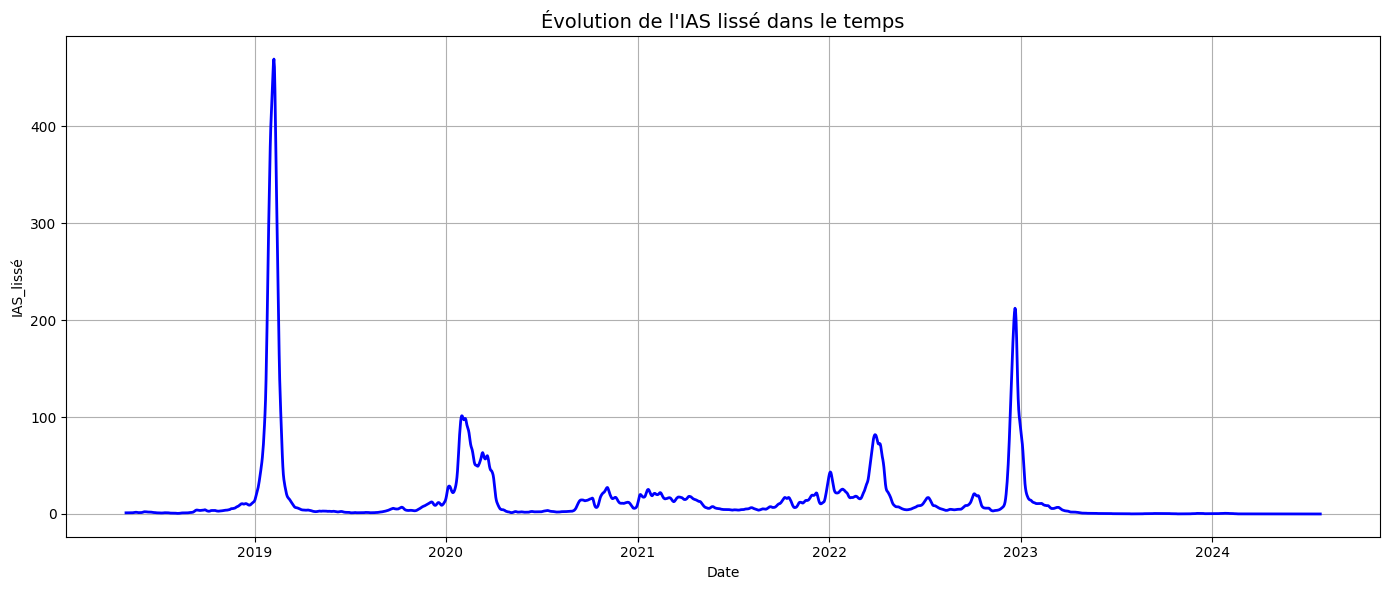

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))
plt.plot(data['PERIODE'], data['IAS_lissé'], color='blue', linewidth=2)
plt.title("Évolution de l'IAS lissé dans le temps", fontsize=14)
plt.xlabel("Date")
plt.ylabel("IAS_lissé")
plt.grid(True)
plt.tight_layout()
plt.show()


## Visulisation par mois

In [ ]:
# Resample the data to a monthly frequency and calculate the mean
ias_mensuel = data.resample('M', on='PERIODE')['IAS_lissé'].mean().reset_index()
ias_mensuel = ias_mensuel.rename(columns={'PERIODE': 'Mois'})
display(ias_mensuel.head())

/tmp/ipython-input-3345205236.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  ias_mensuel = data.resample('M', on='PERIODE')['IAS_lissé'].mean().reset_index()


,Mois,IAS_lissé
0,2018-05-31,1.374194
1,2018-06-30,1.813333
2,2018-07-31,1.077419
3,2018-08-31,0.961290
4,2018-09-30,3.310000


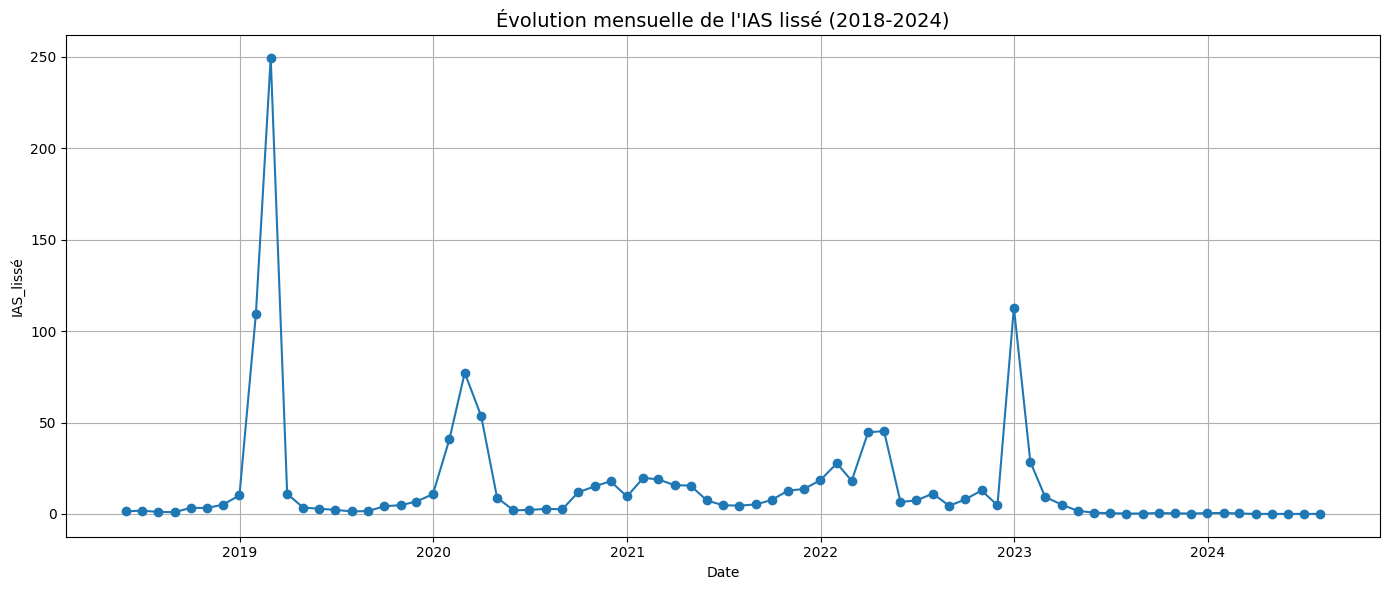

In [ ]:
plt.figure(figsize=(14, 6))
plt.plot(ias_mensuel['Mois'], ias_mensuel['IAS_lissé'], marker='o', linestyle='-')
plt.title("Évolution mensuelle de l'IAS lissé (2018-2024)", fontsize=14)
plt.xlabel("Date")
plt.ylabel("IAS_lissé")
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
data.to_csv('dfIAS_final.csv', index=False)
print("DataFrame saved to dfIAS_final.csv")

DataFrame saved to dfIAS_final.csv


## IAS® Syndrome Grippal : Série temporelle régionales depuis Janvier 2008


In [ ]:
import pandas as pd

# Lecture du CSV avec le séparateur ;
df = pd.read_csv("/content/Openhealth_S-Grippal_Regions.csv", sep=';')

# Afficher les 5 premières lignes
df

,PERIODE,Senti,Sais_2022_2023,Sais_2021_2022,Sais_2020_2021,Sais_2019_2020,Sais_2018_2019,Sais_2017_2018,Loc_Reg11,Loc_Reg21,...,Loc_Reg83,Loc_Reg91,Loc_Reg93,Loc_Reg94,MIN_Saison,MAX_Saison,IN_Def,IN_Temp,Sais_2007_2008,Sais_2008_2009
0,01-11-2023,NaN,"5,97660323008801","8,37521415475661","25,5009949916627","3,36667578709946","3,36133584500276",NaN,"0,03","0,07",...,"0,28","0,08","0,11","9,695","3,36133584500276","25,5009949916627","0,100785499837488",NaN,NaN,NaN
1,02-11-2023,NaN,"5,65822267495676","9,33417276587901","26,4935416574474","3,33647770710565","3,48539706562616",NaN,"0,03","0,08",...,"0,31","0,1","0,18","11,005","3,33647770710565","26,4935416574474","0,108759503719675",NaN,NaN,NaN
2,03-11-2023,NaN,"5,10824873070614","10,4236438545285","27,2492828069852","3,34524438590663","3,62343705180054",NaN,"0,03","0,09",...,"0,35","0,13","0,24","16,825","3,34524438590663","27,2492828069852","0,120702918250266",NaN,NaN,NaN
3,04-11-2023,NaN,"4,49127621962519","11,3706847194188","27,2601069639121","3,4140736742872","3,75127157423187",NaN,"0,03","0,09",...,"0,4","0,17","0,28","25,28","3,4140736742872","27,2601069639121","0,133313952769128",NaN,NaN,NaN
4,05-11-2023,NaN,"3,99128467487126","11,9379304885182","26,3674234425375","3,54131337798871","3,84026913916677",NaN,"0,03","0,1",...,"0,45","0,225","0,25","29,995","3,54131337798871","26,3674234425375","0,144382216347999",NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,28-10-2024,NaN,"0,129242546061489","6,00276703877433","6,66165672452481","22,1806976790584","3,72900915494787","3,15381322202824",NaN,NaN,...,NaN,NaN,NaN,NaN,"0,129242546061489","22,1806976790584",NaN,NaN,NaN,NaN
362,29-10-2024,NaN,"0,117832974925946","6,02843211801466","6,79498542100625","22,6896914361341","3,64966949847317","3,21251822120381",NaN,NaN,...,NaN,NaN,NaN,NaN,"0,117832974925946","22,6896914361341",NaN,NaN,NaN,NaN
363,30-10-2024,NaN,"0,106642250696656","6,03072769120629","7,06860796952116","23,5054938712397","3,54200762903526","3,23388963991791",NaN,NaN,...,NaN,NaN,NaN,NaN,"0,106642250696656","23,5054938712397",NaN,NaN,NaN,NaN
364,31-10-2024,NaN,"0,0997500986700399","6,05050646446687","7,60634684476243","24,4896915746009","3,44194795208156","3,2688513558819",NaN,NaN,...,NaN,NaN,NaN,NaN,"0,0997500986700399","24,4896915746009",NaN,NaN,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 36 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   PERIODE         366 non-null    object 
 1   Senti           0 non-null      float64
 2   Sais_2022_2023  365 non-null    object 
 3   Sais_2021_2022  365 non-null    object 
 4   Sais_2020_2021  365 non-null    object 
 5   Sais_2019_2020  365 non-null    object 
 6   Sais_2018_2019  365 non-null    object 
 7   Sais_2017_2018  184 non-null    object 
 8   Loc_Reg11       267 non-null    object 
 9   Loc_Reg21       267 non-null    object 
 10  Loc_Reg22       267 non-null    object 
 11  Loc_Reg23       267 non-null    object 
 12  Loc_Reg24       267 non-null    object 
 13  Loc_Reg25       267 non-null    object 
 14  Loc_Reg26       267 non-null    object 
 15  Loc_Reg31       267 non-null    object 
 16  Loc_Reg41       267 non-null    object 
 17  Loc_Reg42       267 non-null    obj

In [ ]:
print("Date de début :", df['PERIODE'].min())
print("Date de fin   :", df['PERIODE'].max())

Date de début : 
Date de fin   : 31-12-2023


In [ ]:
df['PERIODE'] = pd.to_datetime(df['PERIODE'], format='%d-%m-%Y', errors='coerce')
saison_cols = [
    'Sais_2022_2023', 'Sais_2021_2022', 'Sais_2020_2021',
    'Sais_2019_2020', 'Sais_2018_2019', 'Sais_2017_2018'
]
region_cols = [col for col in df.columns if col.startswith('Loc_Reg')]
seuils_cols = ['MIN_Saison', 'MAX_Saison', 'IN_Def']
# Fusion de toutes les colonnes à convertir en float
cols_to_convert = saison_cols + region_cols + seuils_cols

# Conversion
for col in cols_to_convert:
    df[col] = df[col].astype(str).str.replace(',', '.', regex=False)
    df[col] = pd.to_numeric(df[col], errors='coerce')


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 36 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   PERIODE         365 non-null    datetime64[ns]
 1   Senti           0 non-null      float64       
 2   Sais_2022_2023  365 non-null    float64       
 3   Sais_2021_2022  365 non-null    float64       
 4   Sais_2020_2021  365 non-null    float64       
 5   Sais_2019_2020  365 non-null    float64       
 6   Sais_2018_2019  365 non-null    float64       
 7   Sais_2017_2018  184 non-null    float64       
 8   Loc_Reg11       267 non-null    float64       
 9   Loc_Reg21       267 non-null    float64       
 10  Loc_Reg22       267 non-null    float64       
 11  Loc_Reg23       267 non-null    float64       
 12  Loc_Reg24       267 non-null    float64       
 13  Loc_Reg25       267 non-null    float64       
 14  Loc_Reg26       267 non-null    float64       
 15  Loc_Re

In [ ]:
df.describe()

,PERIODE,Senti,Sais_2022_2023,Sais_2021_2022,Sais_2020_2021,Sais_2019_2020,Sais_2018_2019,Sais_2017_2018,Loc_Reg11,Loc_Reg21,...,Loc_Reg82,Loc_Reg83,Loc_Reg91,Loc_Reg93,Loc_Reg94,MIN_Saison,MAX_Saison,IN_Def,Sais_2007_2008,Sais_2008_2009
count,365,0.0,365.000000,365.000000,365.000000,365.000000,365.000000,184.000000,267.000000,267.000000,...,267.000000,267.000000,267.000000,267.000000,267.000000,365.000000,365.000000,254.000000,0.0,0.0
mean,2024-05-01 16:06:34.520548096,NaN,13.868449,18.164917,11.557461,19.256542,32.356383,1.961156,0.056667,0.087809,...,0.219401,0.530861,0.206760,0.262360,11.260468,3.833500,55.173313,0.173116,NaN,NaN
min,2023-11-01 00:00:00,NaN,0.099750,3.696187,3.933624,1.396447,1.186495,0.611212,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.099750,4.360203,0.006270,NaN,NaN
25%,2024-01-31 00:00:00,NaN,0.358489,7.047668,5.801763,2.539184,2.474392,1.139161,0.000000,0.000000,...,0.010000,0.020000,0.000000,0.000000,0.000000,0.358489,8.522623,0.012741,NaN,NaN
50%,2024-05-02 00:00:00,NaN,0.911326,13.537795,11.066467,8.952944,4.010784,1.504021,0.020000,0.010000,...,0.020000,0.100000,0.020000,0.010000,0.000000,0.911326,18.028071,0.029619,NaN,NaN
75%,2024-08-01 00:00:00,NaN,6.839224,21.289877,16.533288,22.180698,10.185890,2.962698,0.070000,0.135000,...,0.440000,0.695000,0.282500,0.255000,3.685000,6.602652,60.071047,0.306356,NaN,NaN
max,2024-10-31 00:00:00,NaN,212.170279,81.773333,27.260107,101.258041,469.204739,4.334311,0.310000,0.530000,...,1.030000,3.120000,1.500000,2.020000,256.490000,20.101454,469.204739,0.661715,NaN,NaN
std,NaN,NaN,37.204298,17.033460,6.062321,25.187960,88.700261,1.065118,0.080402,0.127492,...,0.292237,0.778036,0.325245,0.479506,35.142503,4.781469,89.726626,0.209201,NaN,NaN


In [ ]:
# Nombre de valeurs nulles
null_counts = df.isnull().sum()

# Pourcentage de valeurs nulles
null_percent = (null_counts / len(df)) * 100

# Regrouper dans un tableau lisible
null_summary = pd.DataFrame({
    'Valeurs nulles': null_counts,
    'Pourcentage (%)': null_percent.round(2)
})

# Afficher le résultat
print(null_summary)

                Valeurs nulles  Pourcentage (%)
PERIODE                      1             0.27
Senti                      366           100.00
Sais_2022_2023               1             0.27
Sais_2021_2022               1             0.27
Sais_2020_2021               1             0.27
Sais_2019_2020               1             0.27
Sais_2018_2019               1             0.27
Sais_2017_2018             182            49.73
Loc_Reg11                   99            27.05
Loc_Reg21                   99            27.05
Loc_Reg22                   99            27.05
Loc_Reg23                   99            27.05
Loc_Reg24                   99            27.05
Loc_Reg25                   99            27.05
Loc_Reg26                   99            27.05
Loc_Reg31                   99            27.05
Loc_Reg41                   99            27.05
Loc_Reg42                   99            27.05
Loc_Reg43                   99            27.05
Loc_Reg52                   99          

In [ ]:
df.drop(columns=['Sais_2017_2018'], inplace=True)
print(df.shape)

(366, 35)


<Axes: >

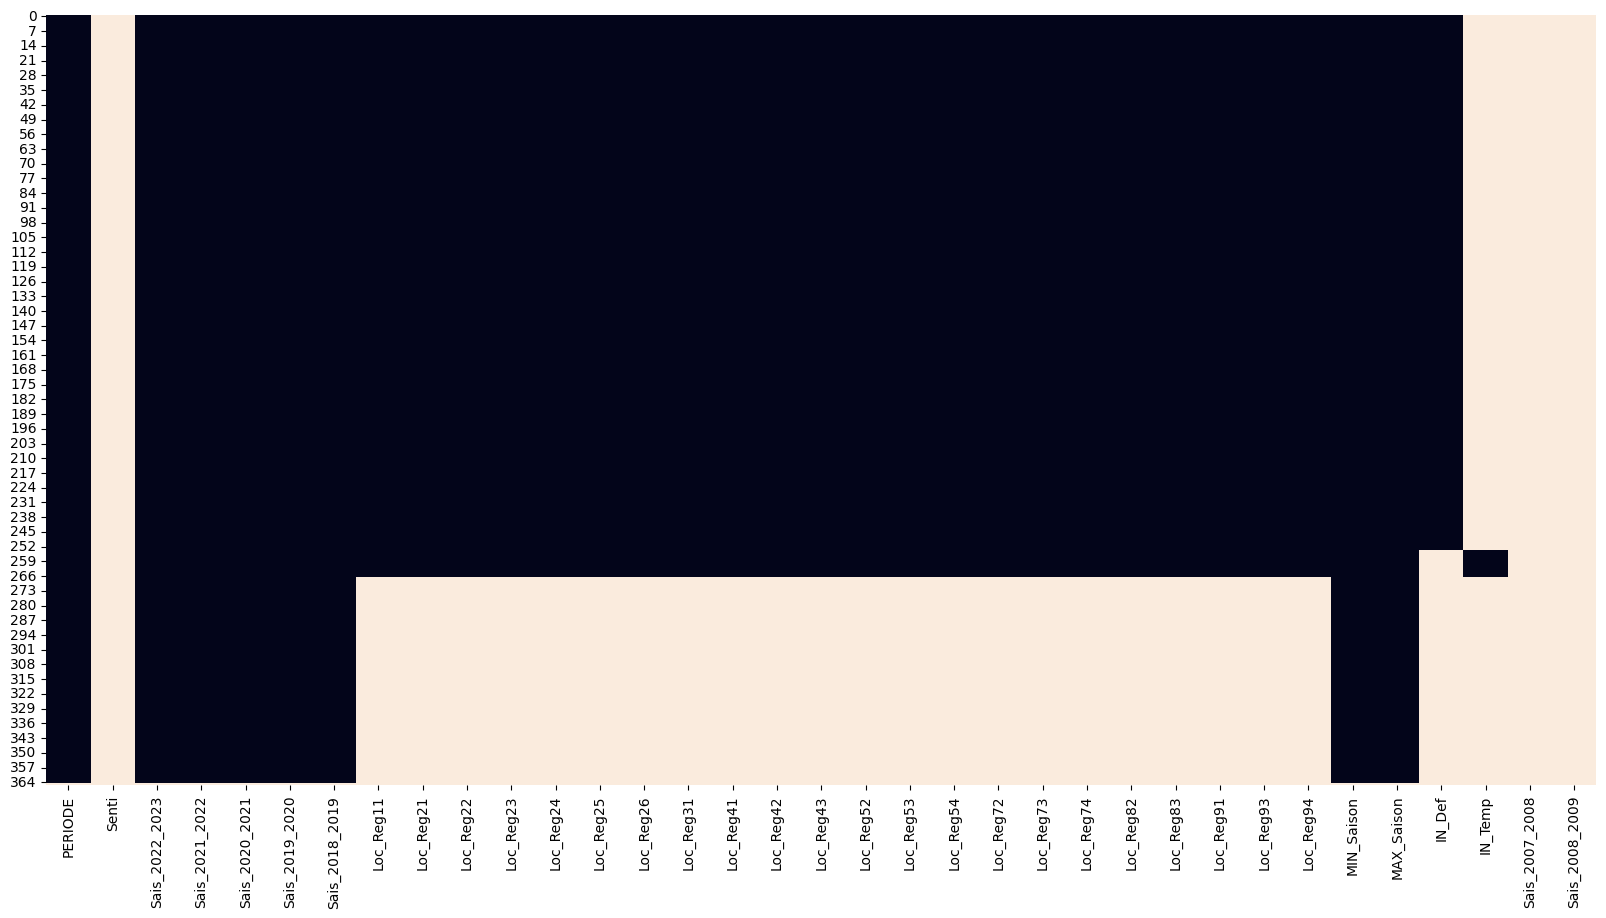

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20, 10))
sns.heatmap(df.isna(), cbar=False)

In [ ]:
# Identify columns with more than 50% null values
cols_to_drop = null_summary[null_summary['Pourcentage (%)'] > 50].index.tolist()

# Drop the identified columns
df.drop(columns=cols_to_drop, inplace=True)

# Display the shape of the dataframe after dropping columns
print(df.shape)

(366, 31)


<Axes: >

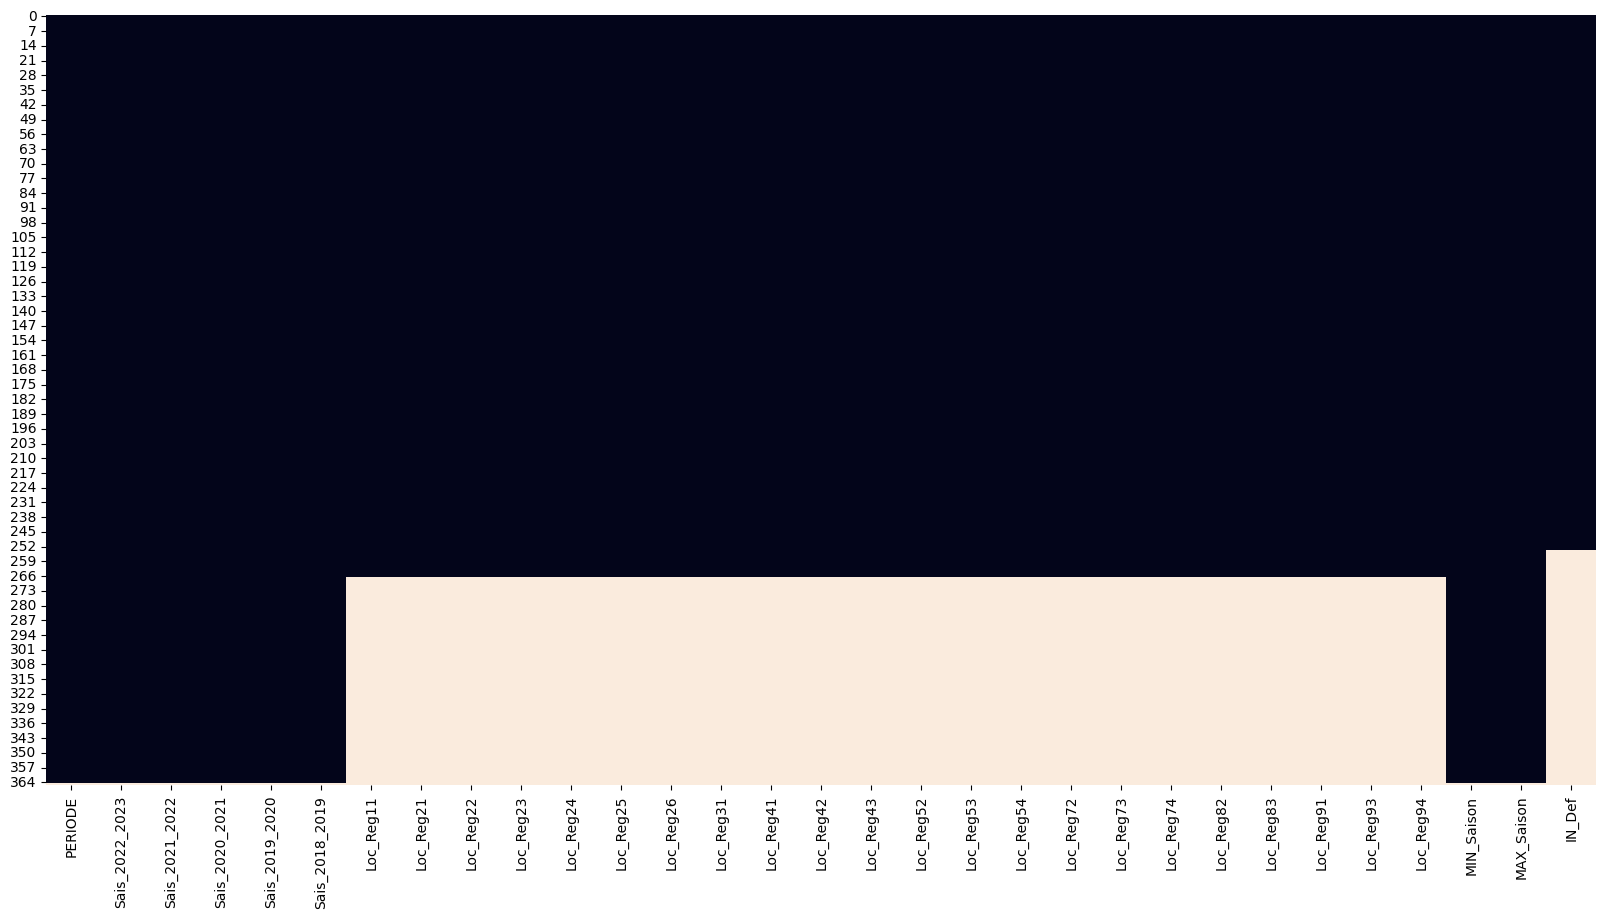

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20, 10))
sns.heatmap(df.isna(), cbar=False)

In [ ]:
# Identify 'Loc_Reg' columns
loc_reg_cols = [col for col in df.columns if 'Loc_Reg' in col]

# Replace commas with dots and convert to numeric
for col in loc_reg_cols:
    df[col] = df[col].astype(str).str.replace(',', '.', regex=False)
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Fill missing values with the mean for each 'Loc_Reg' column
for col in loc_reg_cols:
    df[col] = df[col].fillna(df[col].mean())

# Verify that there are no more null values in 'Loc_Reg' columns
print(df[loc_reg_cols].isnull().sum())

Loc_Reg11    0
Loc_Reg21    0
Loc_Reg22    0
Loc_Reg23    0
Loc_Reg24    0
Loc_Reg25    0
Loc_Reg26    0
Loc_Reg31    0
Loc_Reg41    0
Loc_Reg42    0
Loc_Reg43    0
Loc_Reg52    0
Loc_Reg53    0
Loc_Reg54    0
Loc_Reg72    0
Loc_Reg73    0
Loc_Reg74    0
Loc_Reg82    0
Loc_Reg83    0
Loc_Reg91    0
Loc_Reg93    0
Loc_Reg94    0
dtype: int64


In [ ]:
df.drop(index=365, inplace=True)
print(df.shape)

(365, 31)


<Axes: >

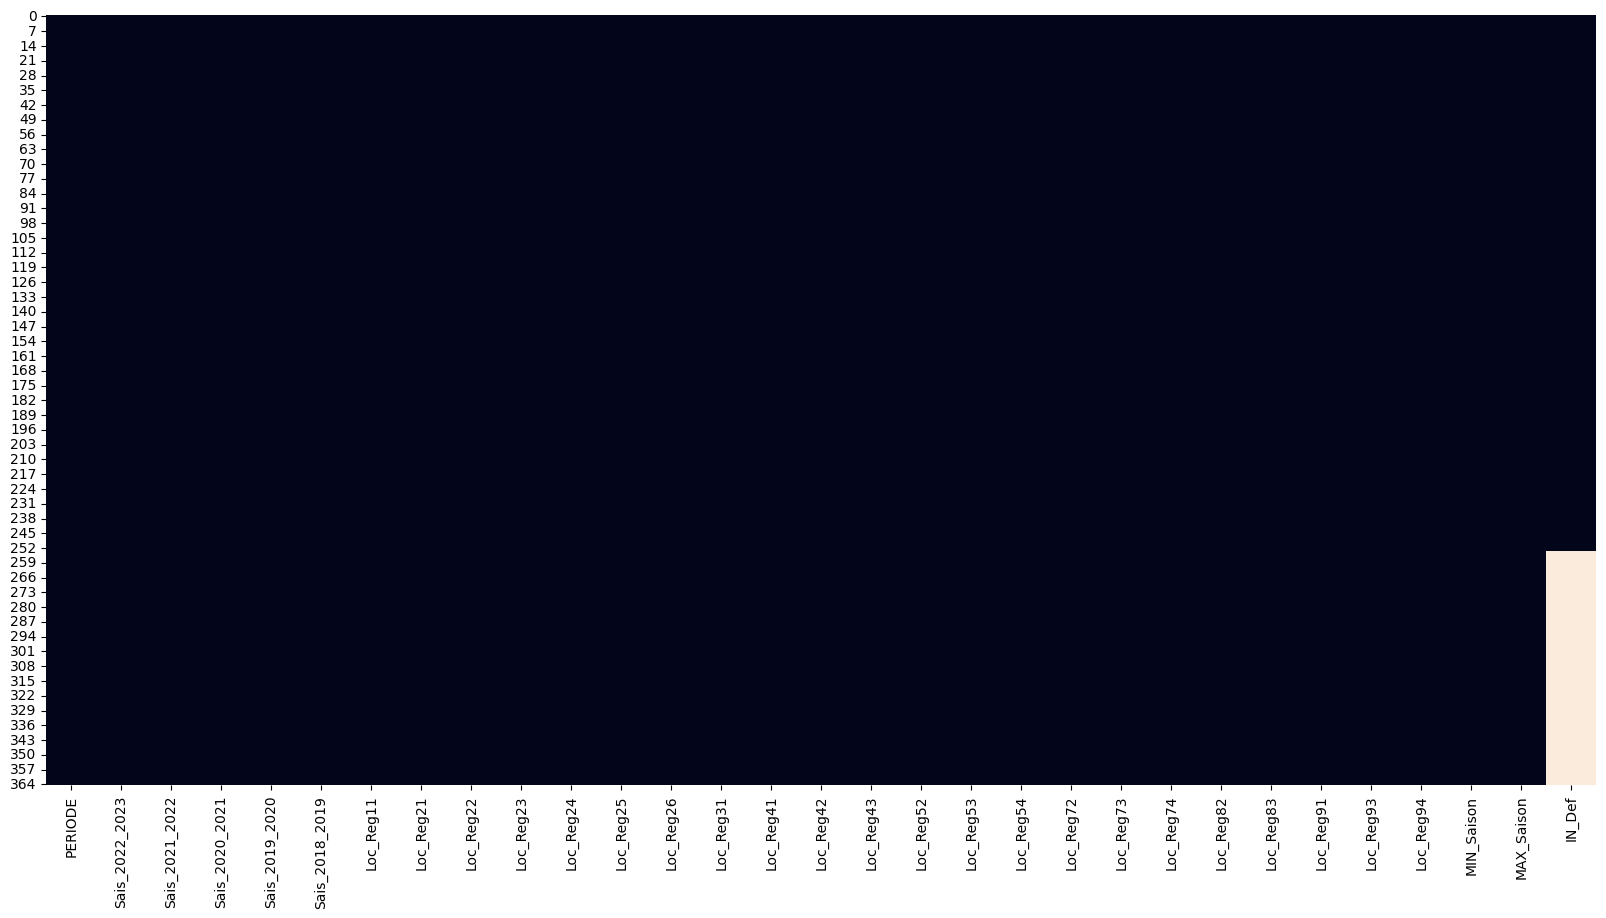

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20, 10))
sns.heatmap(df.isna(), cbar=False)

In [ ]:
# Convert 'PERIODE' to datetime objects for easier indexing
df['PERIODE'] = pd.to_datetime(df['PERIODE'], format='%d-%m-%Y', errors='coerce')

# Select the columns of interest
cols_to_clean = ['IN_Def', 'MIN_Saison', 'MAX_Saison']

# Replace commas with dots and convert to numeric for the selected columns
for col in cols_to_clean:
    df[col] = df[col].astype(str).str.replace(',', '.', regex=False)
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Select the 'IN_Def' column for filling missing values
in_def_col = df['IN_Def']

# Fill missing values with the mean
in_def_mean_filled = in_def_col.fillna(in_def_col.mean())

# Fill missing values with forward fill
in_def_ffill_filled = in_def_col.fillna(method='ffill')

# Choose two different dates for comparison (replace with dates of interest)
date1 = '2024-10-28'
date2 = '2023-11-01'
date3 = '2023-11-30'

# Display the original, mean-filled, and forward-filled values for the chosen dates
print(f"Comparison for IN_Def on {date1}:")
print(f"Original: {in_def_col[df['PERIODE'] == date1].values}")
print(f"Mean Filled: {in_def_mean_filled[df['PERIODE'] == date1].values}")
print(f"Forward Fill: {in_def_ffill_filled[df['PERIODE'] == date1].values}")
print("\n")

print(f"Comparison for IN_Def on {date2}:")
print(f"Original: {in_def_col[df['PERIODE'] == date2].values}")
print(f"Mean Filled: {in_def_mean_filled[df['PERIODE'] == date2].values}")
print(f"Forward Fill: {in_def_ffill_filled[df['PERIODE'] == date2].values}")
print("\n")

print(f"Comparison for IN_Def on {date3}:")
print(f"Original: {in_def_col[df['PERIODE'] == date3].values}")
print(f"Mean Filled: {in_def_mean_filled[df['PERIODE'] == date3].values}")
print(f"Forward Fill: {in_def_ffill_filled[df['PERIODE'] == date3].values}")

Comparison for IN_Def on 2024-10-28:
Original: [nan]
Mean Filled: [0.17311582]
Forward Fill: [0.01172654]


Comparison for IN_Def on 2023-11-01:
Original: [0.1007855]
Mean Filled: [0.1007855]
Forward Fill: [0.1007855]


Comparison for IN_Def on 2023-11-30:
Original: [0.4056141]
Mean Filled: [0.4056141]
Forward Fill: [0.4056141]


/tmp/ipython-input-859128172.py:19: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  in_def_ffill_filled = in_def_col.fillna(method='ffill')


In [ ]:
# Fill missing values in 'IN_Def' with the mean
df['IN_Def'] = df['IN_Def'].fillna(df['IN_Def'].mean())

# Verify that there are no more null values in 'IN_Def'
print(df['IN_Def'].isnull().sum())

0


<Axes: >

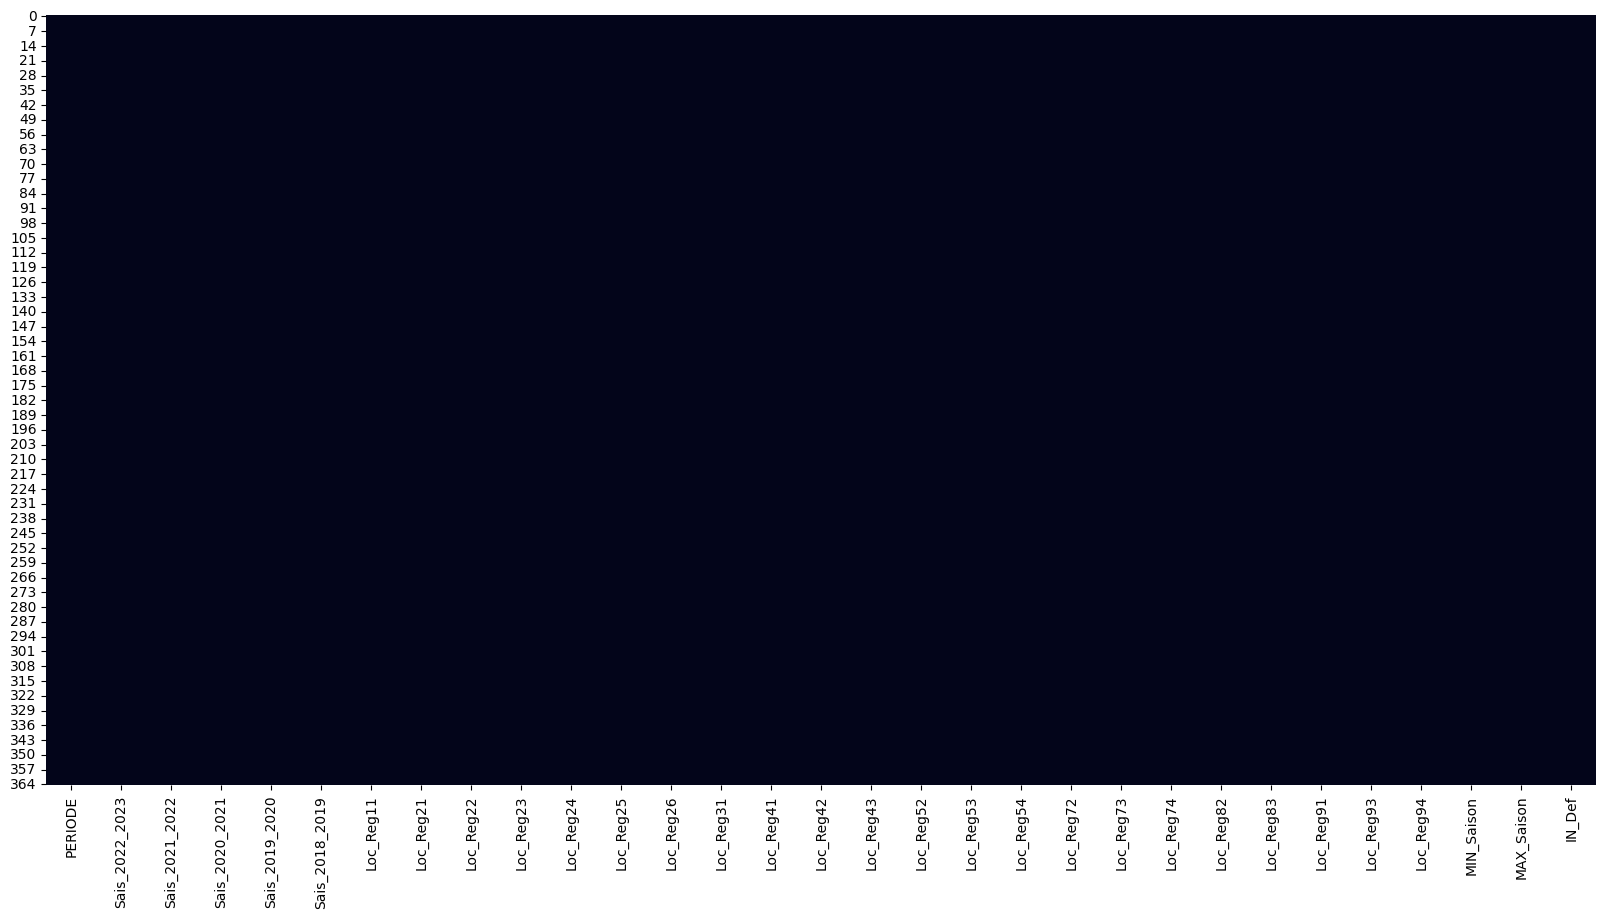

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20, 10))
sns.heatmap(df.isna(), cbar=False)

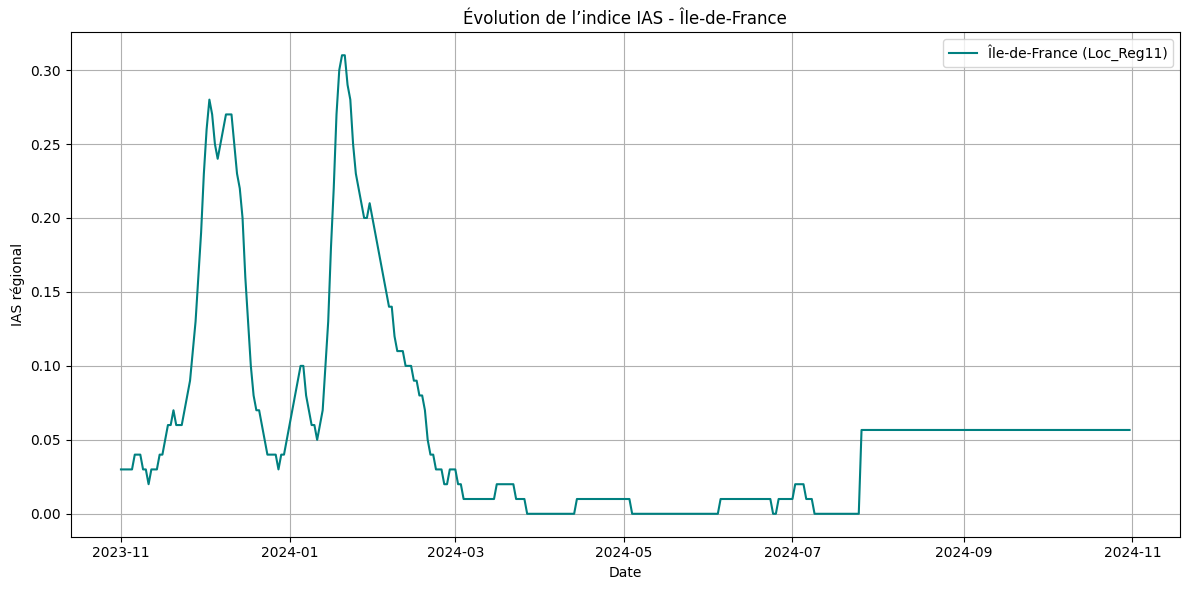

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(df['PERIODE'], df['Loc_Reg11'], label='Île-de-France (Loc_Reg11)', color='teal')
plt.title("Évolution de l’indice IAS - Île-de-France")
plt.xlabel("Date")
plt.ylabel("IAS régional")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


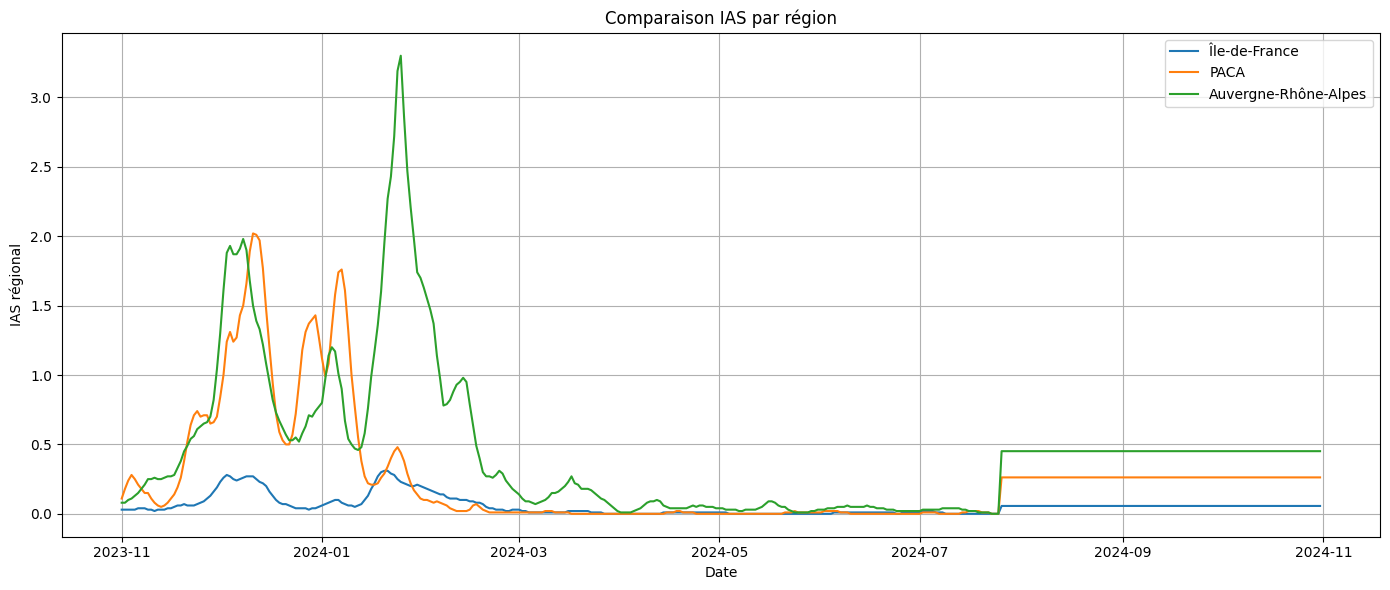

In [ ]:
plt.figure(figsize=(14, 6))
plt.plot(df['PERIODE'], df['Loc_Reg11'], label='Île-de-France')
plt.plot(df['PERIODE'], df['Loc_Reg93'], label='PACA')
plt.plot(df['PERIODE'], df['Loc_Reg24'], label='Auvergne-Rhône-Alpes')
plt.title("Comparaison IAS par région")
plt.xlabel("Date")
plt.ylabel("IAS régional")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


##Final CSV

In [ ]:
df.to_csv('dfRegionIAS_final.csv', index=False)
print("DataFrame saved to dfRegionIAS_final.csv")

DataFrame saved to dfRegionIAS_final.csv


## Passages urgences

In [ ]:
dfUrg = pd.read_csv("/content/passages_urgences.csv", encoding='utf-8', sep=',')


In [ ]:
dfUrg.head()

,1er jour de la semaine,Semaine,Département,Classe d'âge,Taux de passages aux urgences pour grippe,Taux d'hospitalisations après passages aux urgences pour grippe,Région,year,mois
0,2020-12-21,2020-S52,Orne,05-14 ans,0.000000,0.000000,Normandie,2020.0,12.0
1,2020-12-21,2020-S52,Orne,65 ans ou plus,0.000000,0.000000,Normandie,2020.0,12.0
2,2020-12-28,2020-S53,Orne,00-04 ans,500.000000,0.000000,Normandie,2020.0,12.0
3,2020-12-28,2020-S53,Orne,65 ans ou plus,257.069409,526.315789,Normandie,2020.0,12.0
4,2020-12-28,2020-S53,Orne,Tous âges,145.878920,270.270270,Normandie,2020.0,12.0


<Axes: >

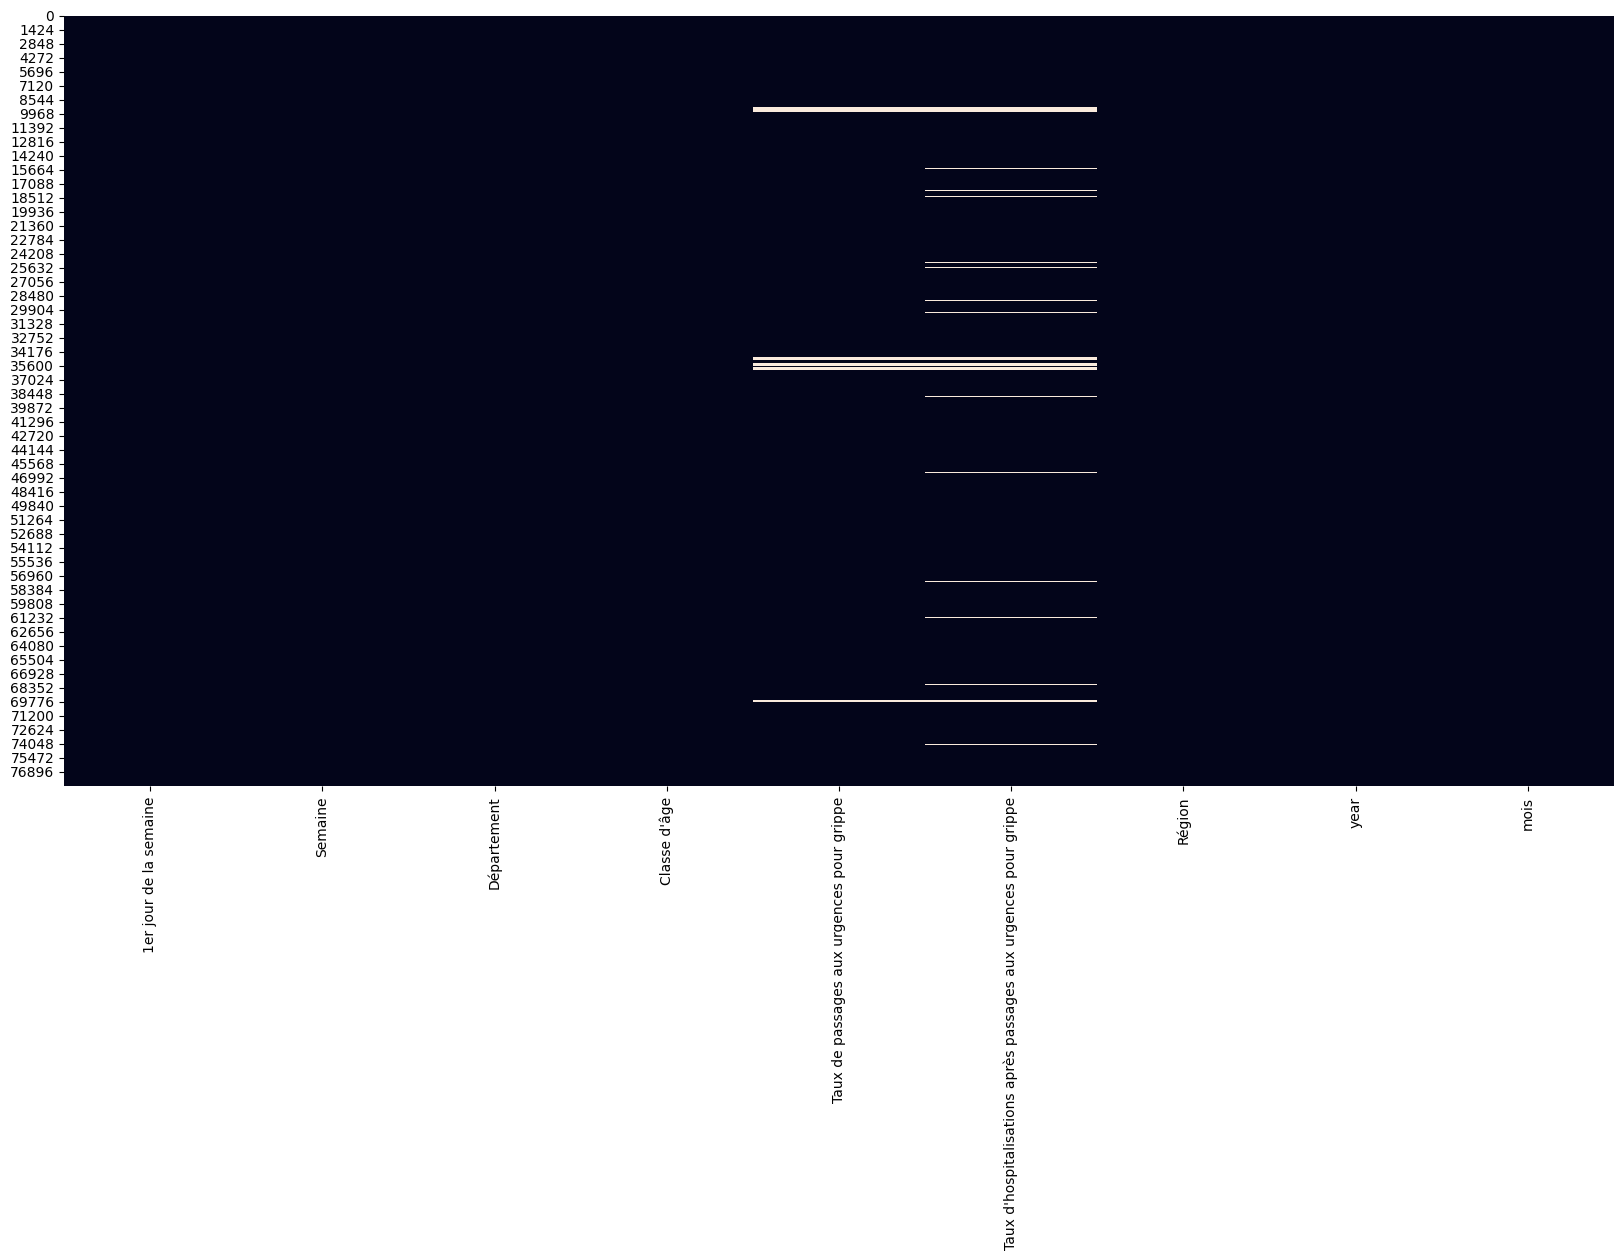

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20, 10))
sns.heatmap(dfUrg.isna(), cbar=False)

## Verification des Valeurs Nulles

In [ ]:
# Nombre de valeurs nulles
null_counts = dfUrg.isnull().sum()

# Pourcentage de valeurs nulles
null_percent = (null_counts / len(dfUrg)) * 100

# Regrouper dans un tableau lisible
null_summary = pd.DataFrame({
    'Valeurs nulles': null_counts,
    'Pourcentage (%)': null_percent.round(2)
})

# Afficher le résultat
print(null_summary)

                                                    Valeurs nulles  \
1er jour de la semaine                                           0   
Semaine                                                          0   
Département                                                      0   
Classe d'âge                                                     1   
Taux de passages aux urgences pour grippe                     1462   
Taux d'hospitalisations après passages aux urge...            2723   
Région                                                           1   
year                                                             1   
mois                                                             1   

                                                    Pourcentage (%)  
1er jour de la semaine                                         0.00  
Semaine                                                        0.00  
Département                                                    0.00  
Classe d'âge       

## Remplacer les valeurs manquantes par 0

In [ ]:
columns_to_fill = ['Classe d\'âge', 'Région', 'year', 'mois']

for col in columns_to_fill:
    dfUrg[col] = dfUrg[col].fillna(0)

# Verify that there are no more null values in these columns
print(dfUrg[columns_to_fill].isnull().sum())

Classe d'âge    0
Région          0
year            0
mois            0
dtype: int64


## Remplacer les valeurs manquante en utilisant Forward Fill

In [ ]:
dfUrg['Taux de passages aux urgences pour grippe'] = dfUrg['Taux de passages aux urgences pour grippe'].fillna(method='ffill')
dfUrg["Taux d'hospitalisations après passages aux urgences pour grippe."] = dfUrg["Taux d'hospitalisations après passages aux urgences pour grippe"].fillna(method='ffill')

# Verify that there are no more null values in these columns
print(dfUrg[['Taux de passages aux urgences pour grippe', "Taux d'hospitalisations après passages aux urgences pour grippe"]].isnull().sum())

Taux de passages aux urgences pour grippe                             0
Taux d'hospitalisations après passages aux urgences pour grippe    2723
dtype: int64


/tmp/ipython-input-1274652105.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  dfUrg['Taux de passages aux urgences pour grippe'] = dfUrg['Taux de passages aux urgences pour grippe'].fillna(method='ffill')
/tmp/ipython-input-1274652105.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  dfUrg["Taux d'hospitalisations après passages aux urgences pour grippe."] = dfUrg["Taux d'hospitalisations après passages aux urgences pour grippe"].fillna(method='ffill')


## Verification des Nan apres nettoyage

In [ ]:
# Nombre de valeurs nulles
null_counts = dfUrg.isnull().sum()

# Pourcentage de valeurs nulles
null_percent = (null_counts / len(dfUrg)) * 100

# Regrouper dans un tableau lisible
null_summary = pd.DataFrame({
    'Valeurs nulles': null_counts,
    'Pourcentage (%)': null_percent.round(2)
})

# Afficher le résultat
print(null_summary)

                                                    Valeurs nulles  \
1er jour de la semaine                                           0   
Semaine                                                          0   
Département                                                      0   
Classe d'âge                                                     0   
Taux de passages aux urgences pour grippe                        0   
Taux d'hospitalisations après passages aux urge...            2723   
Région                                                           0   
year                                                             0   
mois                                                             0   
Taux d'hospitalisations après passages aux urge...               0   

                                                    Pourcentage (%)  
1er jour de la semaine                                         0.00  
Semaine                                                        0.00  
Département        

## telechargement du fichier propre

In [ ]:
dfUrg.to_csv('dfUrg_cleaned.csv', index=False)
print("Cleaned DataFrame saved to dfUrg_cleaned.csv")

Cleaned DataFrame saved to dfUrg_cleaned.csv


In [ ]:
dfUrg = pd.read_csv("/content/dfUrg_cleaned.csv", encoding='utf-8', sep=',')

In [ ]:
print(dfUrg.columns)

Index(['1er jour de la semaine', 'Semaine', 'Département', 'Classe d'âge',
       'Taux de passages aux urgences pour grippe',
       'Taux d'hospitalisations après passages aux urgences pour grippe',
       'Région', 'year', 'mois',
       'Taux d'hospitalisations après passages aux urgences pour grippe.'],
      dtype='object')


In [ ]:
print("Date de début :", dfUrg['1er jour de la semaine'].min())
print("Date de fin   :", dfUrg['1er jour de la semaine'].max())

Date de début : 2019-12-30
Date de fin   : 2023-12-25


In [ ]:
dfUrg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78308 entries, 0 to 78307
Data columns (total 10 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   1er jour de la semaine                                            78308 non-null  object 
 1   Semaine                                                           78308 non-null  object 
 2   Département                                                       78308 non-null  object 
 3   Classe d'âge                                                      78308 non-null  object 
 4   Taux de passages aux urgences pour grippe                         78308 non-null  float64
 5   Taux d'hospitalisations après passages aux urgences pour grippe   75585 non-null  float64
 6   Région                                                            78308 non-null  object 
 7   year                           

In [ ]:
dfUrg.head()

,1er jour de la semaine,Semaine,Département,Classe d'âge,Taux de passages aux urgences pour grippe,Taux d'hospitalisations après passages aux urgences pour grippe,Région,year,mois,Taux d'hospitalisations après passages aux urgences pour grippe.
0,2020-12-21,2020-S52,Orne,05-14 ans,0.000000,0.000000,Normandie,2020,12,0.000000
1,2020-12-21,2020-S52,Orne,65 ans ou plus,0.000000,0.000000,Normandie,2020,12,0.000000
2,2020-12-28,2020-S53,Orne,00-04 ans,500.000000,0.000000,Normandie,2020,12,0.000000
3,2020-12-28,2020-S53,Orne,65 ans ou plus,257.069409,526.315789,Normandie,2020,12,526.315789
4,2020-12-28,2020-S53,Orne,Tous âges,145.878920,270.270270,Normandie,2020,12,270.270270


# ML FOR Passage Urgance

In [ ]:
dfUrg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157040 entries, 0 to 157039
Data columns (total 10 columns):
 #   Column                                                            Non-Null Count   Dtype  
---  ------                                                            --------------   -----  
 0   1er jour de la semaine                                            157040 non-null  object 
 1   Semaine                                                           157040 non-null  object 
 2   Département                                                       157040 non-null  object 
 3   Classe d'âge                                                      157040 non-null  object 
 4   Taux de passages aux urgences pour grippe                         157040 non-null  float64
 5   Taux d'hospitalisations après passages aux urgences pour grippe   149683 non-null  float64
 6   Région                                                            157040 non-null  object 
 7   year                

## Convertion des types de donner

In [ ]:
# 1. Convertir la date principale
dfUrg['1er jour de la semaine'] = pd.to_datetime(dfUrg['1er jour de la semaine'], format='%Y-%m-%d')

# 2. Extraire semaine ISO (si besoin)
dfUrg['Semaine_num'] = pd.to_datetime(dfUrg['1er jour de la semaine']).dt.isocalendar().week

# 3. Encodage des colonnes catégorielles si besoin
cat_cols = ['Département', 'Classe d\'âge', 'Région']
for col in cat_cols:
    dfUrg[col] = dfUrg[col].astype('category')

In [ ]:
dfUrg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78308 entries, 0 to 78307
Data columns (total 11 columns):
 #   Column                                                            Non-Null Count  Dtype         
---  ------                                                            --------------  -----         
 0   1er jour de la semaine                                            78308 non-null  datetime64[ns]
 1   Semaine                                                           78308 non-null  object        
 2   Département                                                       78308 non-null  category      
 3   Classe d'âge                                                      78308 non-null  category      
 4   Taux de passages aux urgences pour grippe                         78308 non-null  float64       
 5   Taux d'hospitalisations après passages aux urgences pour grippe   75585 non-null  float64       
 6   Région                                                            7830

In [ ]:
dfUrg.head()

,1er jour de la semaine,Semaine,Département,Classe d'âge,Taux de passages aux urgences pour grippe,Taux d'hospitalisations après passages aux urgences pour grippe,Région,year,mois,Taux d'hospitalisations après passages aux urgences pour grippe.,Semaine_num
0,2020-12-21,2020-S52,Orne,05-14 ans,0.000000,0.000000,Normandie,2020,12,0.000000,52
1,2020-12-21,2020-S52,Orne,65 ans ou plus,0.000000,0.000000,Normandie,2020,12,0.000000,52
2,2020-12-28,2020-S53,Orne,00-04 ans,500.000000,0.000000,Normandie,2020,12,0.000000,53
3,2020-12-28,2020-S53,Orne,65 ans ou plus,257.069409,526.315789,Normandie,2020,12,526.315789,53
4,2020-12-28,2020-S53,Orne,Tous âges,145.878920,270.270270,Normandie,2020,12,270.270270,53


## Drop Duplicate Colum Semain par ce que j'ai numero de lasemaine comme un ISO

In [ ]:
dfUrg = dfUrg.drop('Semaine', axis=1)
display(dfUrg.head())

,1er jour de la semaine,Département,Classe d'âge,Taux de passages aux urgences pour grippe,Taux d'hospitalisations après passages aux urgences pour grippe,Région,year,mois,Taux d'hospitalisations après passages aux urgences pour grippe.,Semaine_num
0,2020-12-21,Orne,05-14 ans,0.000000,0.000000,Normandie,2020.0,12.0,0.000000,52
1,2020-12-21,Orne,65 ans ou plus,0.000000,0.000000,Normandie,2020.0,12.0,0.000000,52
2,2020-12-28,Orne,00-04 ans,500.000000,0.000000,Normandie,2020.0,12.0,0.000000,53
3,2020-12-28,Orne,65 ans ou plus,257.069409,526.315789,Normandie,2020.0,12.0,526.315789,53
4,2020-12-28,Orne,Tous âges,145.878920,270.270270,Normandie,2020.0,12.0,270.270270,53


## Visualisation de la Colone target

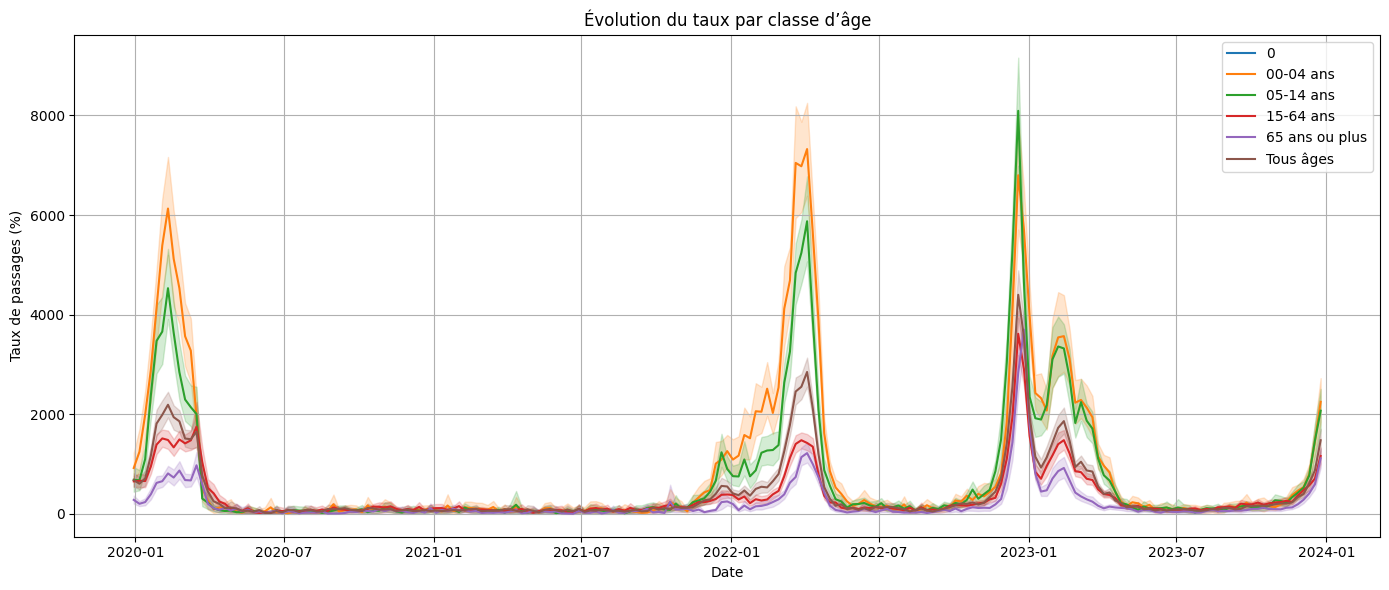

In [ ]:
import seaborn as sns

plt.figure(figsize=(14, 6))
sns.lineplot(data=dfUrg, x='1er jour de la semaine', y='Taux de passages aux urgences pour grippe', hue="Classe d'âge")
plt.title("Évolution du taux par classe d’âge")
plt.xlabel("Date")
plt.ylabel("Taux de passages (%)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


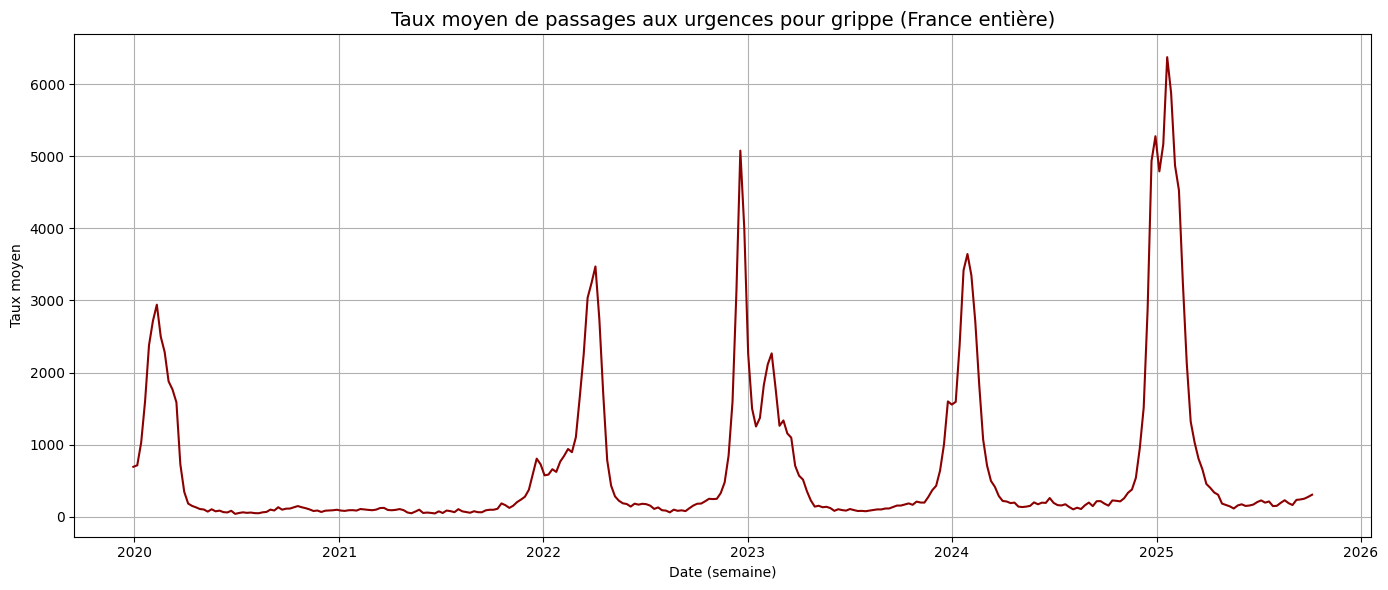

In [ ]:
# Convertir la date si ce n'est pas fait
dfUrg['1er jour de la semaine'] = pd.to_datetime(dfUrg['1er jour de la semaine'])

# Grouper par semaine (1 date = 1 semaine) et prendre la moyenne
df_weekly = dfUrg.groupby('1er jour de la semaine')['Taux de passages aux urgences pour grippe'].mean().reset_index()

# Tracer la courbe
plt.figure(figsize=(14, 6))
plt.plot(df_weekly['1er jour de la semaine'], df_weekly['Taux de passages aux urgences pour grippe'], color='darkred')
plt.title("Taux moyen de passages aux urgences pour grippe (France entière)", fontsize=14)
plt.xlabel("Date (semaine)")
plt.ylabel("Taux moyen")
plt.grid(True)
plt.tight_layout()
plt.show()


## Séparation de donner X Y / First model regression lineare

Colonnes supprimées (duplication + datetime): ['1er jour de la semaine', "Taux d'hospitalisations après passages aux urgences pour grippe"]

Features numériques: ['year', 'mois', "Taux d'hospitalisations après passages aux urgences pour grippe.", 'Semaine_num']
Features catégorielles: ['Département', "Classe d'âge", 'Région']

Shape X: (157040, 7)
Shape y: (157040,)

Valeurs manquantes dans X:
Département                                                         0
Classe d'âge                                                        0
Région                                                              0
year                                                                0
mois                                                                0
Taux d'hospitalisations après passages aux urgences pour grippe.    0
Semaine_num                                                         0
dtype: int64

Taille train: (125632, 7)
Taille test: (31408, 7)

✓ Pipeline créé avec Régression Linéaire!

Entra

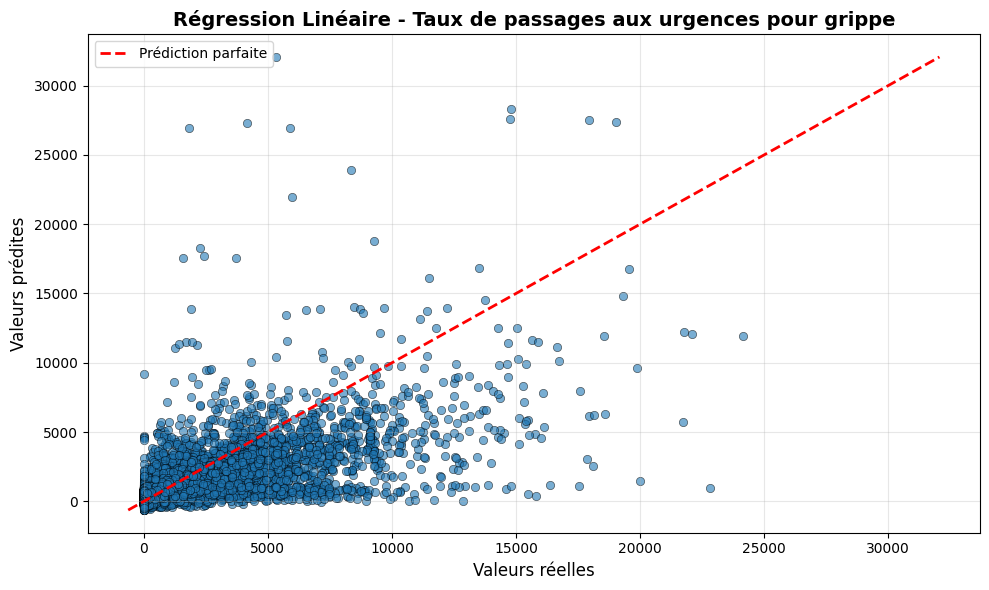


Calcul de la learning curve...

Calcul du score R² sur l'entraînement...

TEST D'OVERFITTING - RÉGRESSION LINÉAIRE
R² Score Entraînement: 0.4676
R² Score Test: 0.4667
Pas de signe fort d'overfitting.


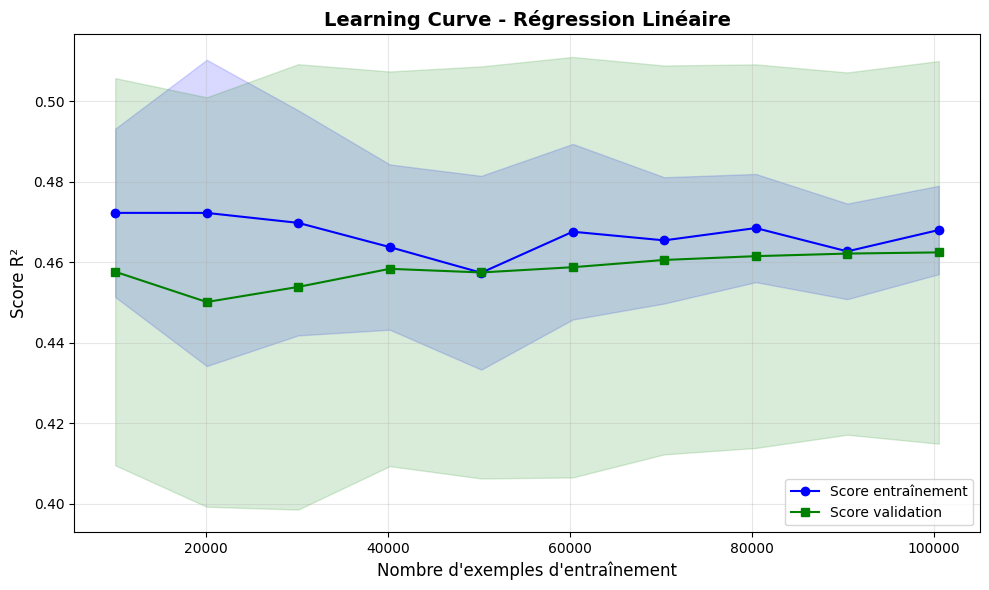


✓ Analyse terminée!


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# 2. SELECT FEATURES AND TARGET
target_col = "Taux de passages aux urgences pour grippe"

# Séparer features (X) et target (y)
y = dfUrg[target_col]
X = dfUrg.drop(columns=[target_col])

# Supprimer les colonnes inutiles
colonnes_a_supprimer = [
    '1er jour de la semaine',
    'Semaine',
    'Taux d\'hospitalisations après passages aux urgences pour grippe'
]
X = X.drop(columns=[col for col in colonnes_a_supprimer if col in X.columns])

print("Colonnes supprimées (duplication + datetime):", [col for col in colonnes_a_supprimer if col in dfUrg.columns])

# Identifier les colonnes par type
numeric_features = X.select_dtypes(include=['int64', 'float64', 'UInt32']).columns.tolist()
categorical_features = X.select_dtypes(include=['category', 'object']).columns.tolist()

# CORRECTION: Convertir toutes les colonnes catégorielles en string pour éviter l'erreur
for col in categorical_features:
    X[col] = X[col].astype(str)

print(f"\nFeatures numériques: {numeric_features}")
print(f"Features catégorielles: {categorical_features}")
print(f"\nShape X: {X.shape}")
print(f"Shape y: {y.shape}")
print(f"\nValeurs manquantes dans X:\n{X.isnull().sum()}")

# TRAIN-TEST SPLIT
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, shuffle=True
)

print(f"\nTaille train: {X_train.shape}")
print(f"Taille test: {X_test.shape}")

# PIPELINE
# Preprocessing pour features numériques
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Preprocessing pour features catégorielles
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

# Column Transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# Pipeline complet avec Régression Linéaire
model = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

print("\n✓ Pipeline créé avec Régression Linéaire!")

# FIT
print("\nEntraînement du modèle...")
model.fit(X_train, y_train)
print("✓ Modèle entraîné!")

# PREDICT & METRICS
print("\nPrédictions sur l'ensemble de test...")
y_pred = model.predict(X_test)

# Calcul des métriques
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\n" + "="*50)
print("MÉTRIQUES DE PERFORMANCE")
print("="*50)
print(f"R² Score: {r2:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print("="*50)

# REGRESSION SCATTER PLOT
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6, edgecolors='k', linewidth=0.5)

# Ligne de régression parfaite
min_val = min(y_test.min(), y_pred.min())
max_val = max(y_test.max(), y_pred.max())
plt.plot([min_val, max_val], [min_val, max_val], 'r--', lw=2, label='Prédiction parfaite')

plt.xlabel('Valeurs réelles', fontsize=12)
plt.ylabel('Valeurs prédites', fontsize=12)
plt.title('Régression Linéaire - Taux de passages aux urgences pour grippe', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# LEARNING CURVE
print("\nCalcul de la learning curve...")
train_sizes, train_scores, val_scores = learning_curve(
    model, X_train, y_train,
    cv=5,
    n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10),
    scoring='r2',
    random_state=42
)

# Calcul des moyennes et std
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

# TEST D'OVERFITTING
print("\nCalcul du score R² sur l'entraînement...")
y_train_pred = model.predict(X_train)
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_pred)

print("\n" + "="*50)
print("TEST D'OVERFITTING - RÉGRESSION LINÉAIRE")
print("="*50)
print(f"R² Score Entraînement: {r2_train:.4f}")
print(f"R² Score Test: {r2_test:.4f}")
print("="*50)

if r2_train - r2_test > 0.1:
    print("Attention : le modèle risque de sur-apprendre (overfitting) !")
else:
    print("Pas de signe fort d'overfitting.")


# Plot learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Score entraînement', color='blue', marker='o')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.15, color='blue')

plt.plot(train_sizes, val_mean, label='Score validation', color='green', marker='s')
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, alpha=0.15, color='green')

plt.xlabel("Nombre d'exemples d'entraînement", fontsize=12)
plt.ylabel('Score R²', fontsize=12)
plt.title('Learning Curve - Régression Linéaire', fontsize=14, fontweight='bold')
plt.legend(loc='best')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("\n✓ Analyse terminée!")

## RandomForestRegressor


✓ Pipeline créé avec Random Forest!

Entraînement du modèle...
✓ Modèle entraîné!

MÉTRIQUES DE PERFORMANCE - RANDOM FOREST
R² Score: 0.7685
RMSE: 783.9894
MAE: 290.7840
MSE: 614639.4126

TEST D'OVERFITTING - RANDOM FOREST
R² Score Entraînement: 0.9682
R² Score Test: 0.7685
Attention : le modèle risque de sur-apprendre (overfitting) !


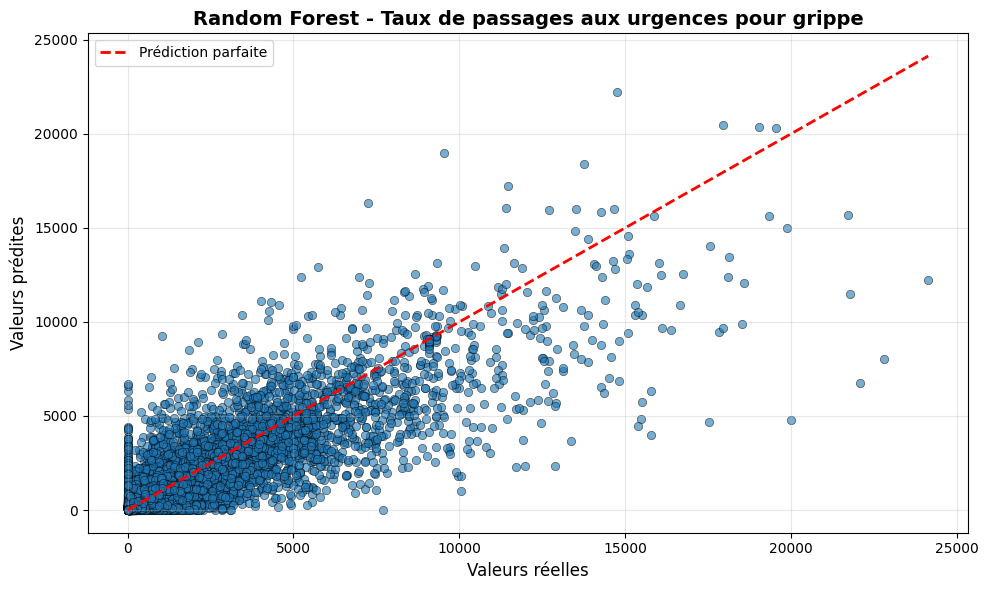


✓ Analyse terminée!


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Pipeline avec Random Forest
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_features)
    ]
)

model_rf = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1))
])

print("\n✓ Pipeline créé avec Random Forest!")

# FIT
print("\nEntraînement du modèle...")
model_rf.fit(X_train, y_train)
print("✓ Modèle entraîné!")

# PREDICT & METRICS
y_pred_rf = model_rf.predict(X_test)

mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("\n" + "="*50)
print("MÉTRIQUES DE PERFORMANCE - RANDOM FOREST")
print("="*50)
print(f"R² Score: {r2_rf:.4f}")
print(f"RMSE: {rmse_rf:.4f}")
print(f"MAE: {mae_rf:.4f}")
print(f"MSE: {mse_rf:.4f}")
print("="*50)

# TEST D'OVERFITTING
y_train_pred_rf = model_rf.predict(X_train)
r2_train_rf = r2_score(y_train, y_train_pred_rf)
r2_test_rf = r2_score(y_test, y_pred_rf)

print("\n" + "="*50)
print("TEST D'OVERFITTING - RANDOM FOREST")
print("="*50)
print(f"R² Score Entraînement: {r2_train_rf:.4f}")
print(f"R² Score Test: {r2_test_rf:.4f}")
print("="*50)

if r2_train_rf - r2_test_rf > 0.1:
    print("Attention : le modèle risque de sur-apprendre (overfitting) !")
else:
    print("Pas de signe fort d'overfitting.")

# REGRESSION SCATTER PLOT
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.6, edgecolors='k', linewidth=0.5)
min_val = min(y_test.min(), y_pred_rf.min())
max_val = max(y_test.max(), y_pred_rf.max())
plt.plot([min_val, max_val], [min_val, max_val], 'r--', lw=2, label='Prédiction parfaite')
plt.xlabel('Valeurs réelles', fontsize=12)
plt.ylabel('Valeurs prédites', fontsize=12)
plt.title('Random Forest - Taux de passages aux urgences pour grippe', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("\n✓ Analyse terminée!")


## GradientBoostingRegressor


✓ Pipeline créé avec Gradient Boosting!

Entraînement du modèle...
✓ Modèle entraîné!

MÉTRIQUES DE PERFORMANCE - GRADIENT BOOSTING
R² Score: 0.6643
RMSE: 944.1759
MAE: 407.3345
MSE: 891468.0969

TEST D'OVERFITTING - GRADIENT BOOSTING
R² Score Entraînement: 0.6778
R² Score Test: 0.6643
Pas de signe fort d'overfitting.


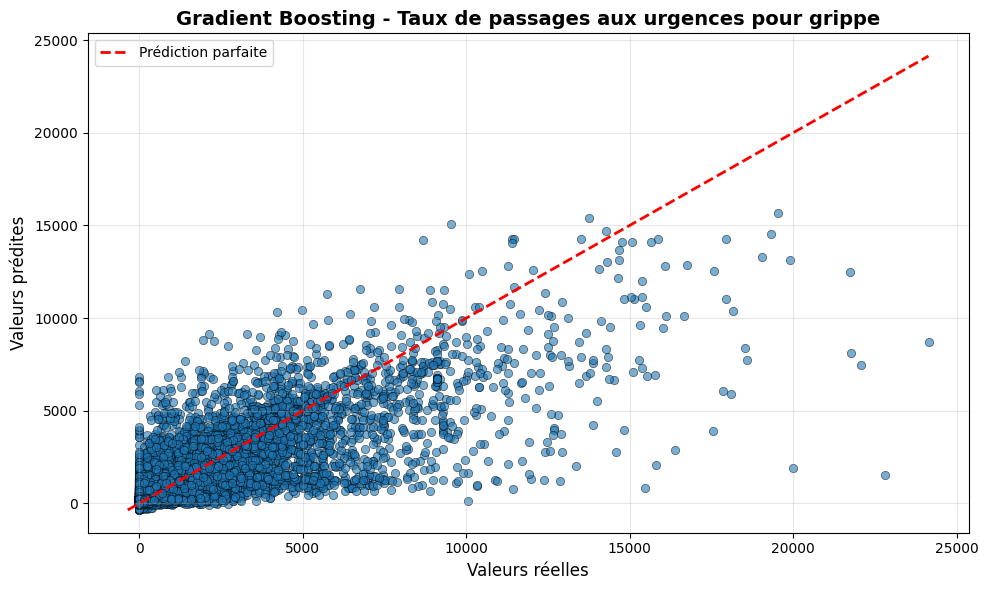


✓ Analyse terminée!


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Pipeline avec Gradient Boosting
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_features)
    ]
)

model_gb = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', GradientBoostingRegressor(n_estimators=100, random_state=42))
])

print("\n✓ Pipeline créé avec Gradient Boosting!")

# FIT
print("\nEntraînement du modèle...")
model_gb.fit(X_train, y_train)
print("✓ Modèle entraîné!")

# PREDICT & METRICS
y_pred_gb = model_gb.predict(X_test)

mse_gb = mean_squared_error(y_test, y_pred_gb)
rmse_gb = np.sqrt(mse_gb)
mae_gb = mean_absolute_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

print("\n" + "="*50)
print("MÉTRIQUES DE PERFORMANCE - GRADIENT BOOSTING")
print("="*50)
print(f"R² Score: {r2_gb:.4f}")
print(f"RMSE: {rmse_gb:.4f}")
print(f"MAE: {mae_gb:.4f}")
print(f"MSE: {mse_gb:.4f}")
print("="*50)

# TEST D'OVERFITTING
y_train_pred_gb = model_gb.predict(X_train)
r2_train_gb = r2_score(y_train, y_train_pred_gb)
r2_test_gb = r2_score(y_test, y_pred_gb)

print("\n" + "="*50)
print("TEST D'OVERFITTING - GRADIENT BOOSTING")
print("="*50)
print(f"R² Score Entraînement: {r2_train_gb:.4f}")
print(f"R² Score Test: {r2_test_gb:.4f}")
print("="*50)

if r2_train_gb - r2_test_gb > 0.1:
    print("Attention : le modèle risque de sur-apprendre (overfitting) !")
else:
    print("Pas de signe fort d'overfitting.")

# REGRESSION SCATTER PLOT
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_gb, alpha=0.6, edgecolors='k', linewidth=0.5)
min_val = min(y_test.min(), y_pred_gb.min())
max_val = max(y_test.max(), y_pred_gb.max())
plt.plot([min_val, max_val], [min_val, max_val], 'r--', lw=2, label='Prédiction parfaite')
plt.xlabel('Valeurs réelles', fontsize=12)
plt.ylabel('Valeurs prédites', fontsize=12)
plt.title('Gradient Boosting - Taux de passages aux urgences pour grippe', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("\n✓ Analyse terminée!")


## Polynomiale (degré 2)

## MPL Regressor de Sicket Learn


✓ Pipeline créé avec MLP Regressor!

Entraînement du modèle...


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


✓ Modèle entraîné!

MÉTRIQUES DE PERFORMANCE - MLP REGRESSOR
R² Score: 0.7796
RMSE: 765.0357
MAE: 363.1559
MSE: 585279.6169

TEST D'OVERFITTING - MLP REGRESSOR
R² Score Entraînement: 0.8231
R² Score Test: 0.7796
Pas de signe fort d'overfitting.


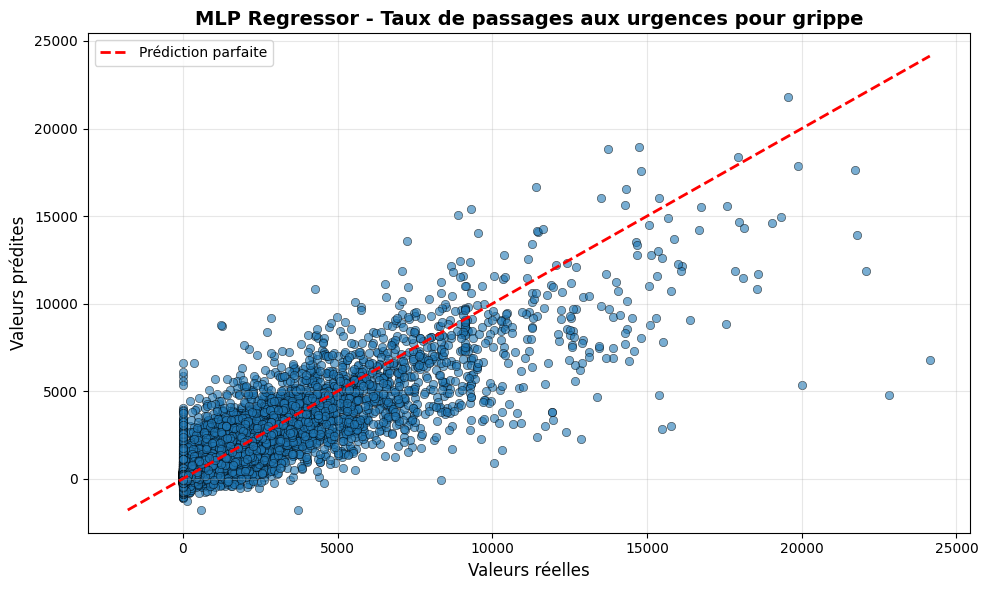


✓ Analyse terminée!


In [ ]:
from sklearn.neural_network import MLPRegressor
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Pipeline avec MLP
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_features)
    ]
)

model_mlp = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42))
])

print("\n✓ Pipeline créé avec MLP Regressor!")

# FIT
print("\nEntraînement du modèle...")
model_mlp.fit(X_train, y_train)
print("✓ Modèle entraîné!")

# PREDICT & METRICS
y_pred_mlp = model_mlp.predict(X_test)

mse_mlp = mean_squared_error(y_test, y_pred_mlp)
rmse_mlp = np.sqrt(mse_mlp)
mae_mlp = mean_absolute_error(y_test, y_pred_mlp)
r2_mlp = r2_score(y_test, y_pred_mlp)

print("\n" + "="*50)
print("MÉTRIQUES DE PERFORMANCE - MLP REGRESSOR")
print("="*50)
print(f"R² Score: {r2_mlp:.4f}")
print(f"RMSE: {rmse_mlp:.4f}")
print(f"MAE: {mae_mlp:.4f}")
print(f"MSE: {mse_mlp:.4f}")
print("="*50)

# TEST D'OVERFITTING
y_train_pred_mlp = model_mlp.predict(X_train)
r2_train_mlp = r2_score(y_train, y_train_pred_mlp)
r2_test_mlp = r2_score(y_test, y_pred_mlp)

print("\n" + "="*50)
print("TEST D'OVERFITTING - MLP REGRESSOR")
print("="*50)
print(f"R² Score Entraînement: {r2_train_mlp:.4f}")
print(f"R² Score Test: {r2_test_mlp:.4f}")
print("="*50)

if r2_train_mlp - r2_test_mlp > 0.1:
    print("Attention : le modèle risque de sur-apprendre (overfitting) !")
else:
    print("Pas de signe fort d'overfitting.")

# REGRESSION SCATTER PLOT
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_mlp, alpha=0.6, edgecolors='k', linewidth=0.5)
min_val = min(y_test.min(), y_pred_mlp.min())
max_val = max(y_test.max(), y_pred_mlp.max())
plt.plot([min_val, max_val], [min_val, max_val], 'r--', lw=2, label='Prédiction parfaite')
plt.xlabel('Valeurs réelles', fontsize=12)
plt.ylabel('Valeurs prédites', fontsize=12)
plt.title('MLP Regressor - Taux de passages aux urgences pour grippe', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("\n✓ Analyse terminée!")


## XGBoost


✓ Pipeline créé avec XGBoost!

Entraînement du modèle...
✓ Modèle entraîné!

MÉTRIQUES DE PERFORMANCE - XGBOOST
R² Score: 0.7955
RMSE: 736.9491
MAE: 300.7051
MSE: 543093.9759

TEST D'OVERFITTING - XGBOOST
R² Score Entraînement: 0.8750
R² Score Test: 0.7955
Pas de signe fort d'overfitting.


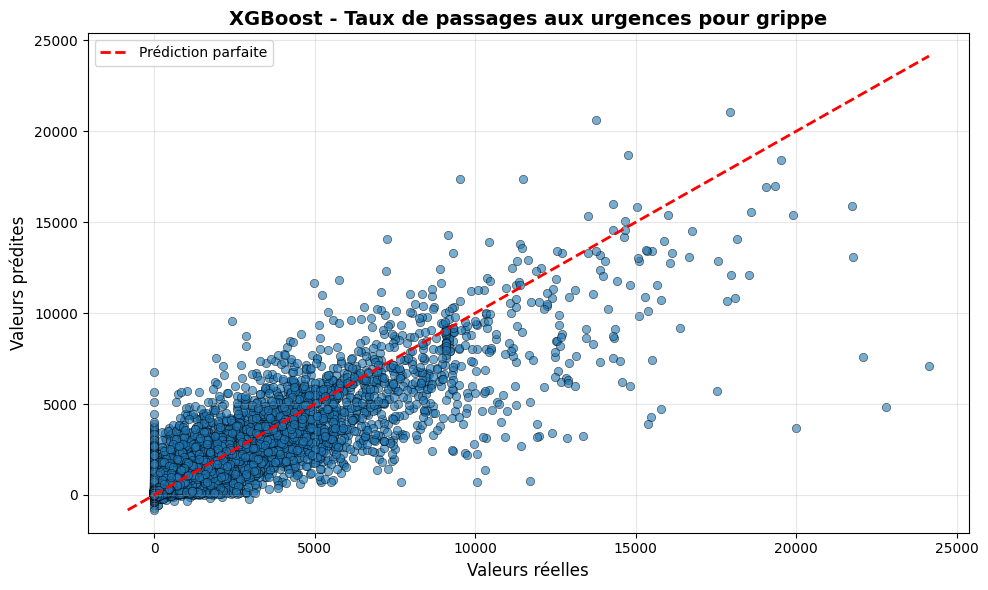


✓ Analyse terminée!


In [ ]:
from xgboost import XGBRegressor
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Pipeline avec XGBoost
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_features)
    ]
)

model_xgb = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', XGBRegressor(
        n_estimators=200,
        max_depth=8,
        learning_rate=0.1,
        random_state=42,
        n_jobs=-1
    ))
])

print("\n✓ Pipeline créé avec XGBoost!")

# FIT
print("\nEntraînement du modèle...")
model_xgb.fit(X_train, y_train)
print("✓ Modèle entraîné!")

# PREDICT & METRICS
y_pred_xgb = model_xgb.predict(X_test)

mse_xgb = mean_squared_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mse_xgb)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print("\n" + "="*50)
print("MÉTRIQUES DE PERFORMANCE - XGBOOST")
print("="*50)
print(f"R² Score: {r2_xgb:.4f}")
print(f"RMSE: {rmse_xgb:.4f}")
print(f"MAE: {mae_xgb:.4f}")
print(f"MSE: {mse_xgb:.4f}")
print("="*50)

# TEST D'OVERFITTING
y_train_pred_xgb = model_xgb.predict(X_train)
r2_train_xgb = r2_score(y_train, y_train_pred_xgb)
r2_test_xgb = r2_score(y_test, y_pred_xgb)

print("\n" + "="*50)
print("TEST D'OVERFITTING - XGBOOST")
print("="*50)
print(f"R² Score Entraînement: {r2_train_xgb:.4f}")
print(f"R² Score Test: {r2_test_xgb:.4f}")
print("="*50)

if r2_train_xgb - r2_test_xgb > 0.1:
    print("Attention : le modèle risque de sur-apprendre (overfitting) !")
else:
    print("Pas de signe fort d'overfitting.")

# REGRESSION SCATTER PLOT
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_xgb, alpha=0.6, edgecolors='k', linewidth=0.5)
min_val = min(y_test.min(), y_pred_xgb.min())
max_val = max(y_test.max(), y_pred_xgb.max())
plt.plot([min_val, max_val], [min_val, max_val], 'r--', lw=2, label='Prédiction parfaite')
plt.xlabel('Valeurs réelles', fontsize=12)
plt.ylabel('Valeurs prédites', fontsize=12)
plt.title('XGBoost - Taux de passages aux urgences pour grippe', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("\n✓ Analyse terminée!")


##  Feature Engineering

In [ ]:
import pandas as pd
import numpy as np

# 1. CRÉER UNE COPIE AVANT LE FEATURE ENGINEERING
print("🔧 FEATURE ENGINEERING EN COURS...")
dfUrg_fe = dfUrg.copy()

# ========================================
# 2. FEATURES CYCLIQUES (SIN/COS)
# ========================================
# Pourquoi ? Le modèle comprend que décembre (12) est proche de janvier (1)

# Mois (cycle de 12 mois)
dfUrg_fe['mois_sin'] = np.sin(2 * np.pi * dfUrg_fe['mois'] / 12)
dfUrg_fe['mois_cos'] = np.cos(2 * np.pi * dfUrg_fe['mois'] / 12)

# Semaine (cycle de 52 semaines)
dfUrg_fe['semaine_sin'] = np.sin(2 * np.pi * dfUrg_fe['Semaine_num'] / 52)
dfUrg_fe['semaine_cos'] = np.cos(2 * np.pi * dfUrg_fe['Semaine_num'] / 52)

print("✓ Features cycliques créées (mois_sin, mois_cos, semaine_sin, semaine_cos)")

# ========================================
# 3. SAISON
# ========================================
def get_saison(mois):
    if mois in [12, 1, 2]:
        return 'hiver'
    elif mois in [3, 4, 5]:
        return 'printemps'
    elif mois in [6, 7, 8]:
        return 'ete'
    else:
        return 'automne'

dfUrg_fe['saison'] = dfUrg_fe['mois'].apply(get_saison)
print("✓ Feature saison créée")

# ========================================
# 4. PÉRIODE ÉPIDÉMIQUE (pic grippe)
# ========================================
# Octobre à Mars = période de grippe
dfUrg_fe['periode_grippe'] = dfUrg_fe['mois'].isin([10, 11, 12, 1, 2, 3]).astype(int)
print("✓ Feature periode_grippe créée")

# ========================================
# 5. INTERACTION TEMPORELLE
# ========================================
# Combine année et mois
dfUrg_fe['year_mois'] = dfUrg_fe['year'] * 100 + dfUrg_fe['mois']
print("✓ Feature year_mois créée")

# ========================================
# 6. AGRÉGATIONS PAR RÉGION
# ========================================
# Moyenne du taux d'hospitalisation par région (proxy de gravité)
region_hosp_mean = dfUrg_fe.groupby('Région')['Taux d\'hospitalisations après passages aux urgences pour grippe.'].transform('mean')
dfUrg_fe['region_hosp_mean'] = region_hosp_mean

print("✓ Feature region_hosp_mean créée")

# ========================================
# 7. AGRÉGATIONS PAR CLASSE D'ÂGE
# ========================================
# Moyenne par classe d'âge
age_hosp_mean = dfUrg_fe.groupby('Classe d\'âge')['Taux d\'hospitalisations après passages aux urgences pour grippe.'].transform('mean')
dfUrg_fe['age_hosp_mean'] = age_hosp_mean

print("✓ Feature age_hosp_mean créée")

# ========================================
# 8. INDICATEUR ÂGES À RISQUE
# ========================================
# Les 65+ et 0-4 ans sont plus à risque
dfUrg_fe['age_risque'] = dfUrg_fe['Classe d\'âge'].isin(['65 ans ou plus', '00-04 ans']).astype(int)
print("✓ Feature age_risque créée")

# ========================================
# RÉSUMÉ
# ========================================
print("\n" + "="*60)
print("RÉSUMÉ DES NOUVELLES FEATURES")
print("="*60)
nouvelles_features = [
    'mois_sin', 'mois_cos', 'semaine_sin', 'semaine_cos',
    'saison', 'periode_grippe', 'year_mois',
    'region_hosp_mean', 'age_hosp_mean', 'age_risque'
]
print(f"Nombre de nouvelles features: {len(nouvelles_features)}")
print(f"Features créées: {nouvelles_features}")
print(f"\nShape avant: {dfUrg.shape}")
print(f"Shape après: {dfUrg_fe.shape}")
print("="*60)

# ========================================
# 9. MAINTENANT UTILISER dfUrg_fe AU LIEU DE dfUrg
# ========================================
print("\n🚀 Prêt à entraîner avec les nouvelles features!")
print("⚠️  Utilisez maintenant 'dfUrg_fe' au lieu de 'dfUrg' dans votre code d'entraînement\n")

# Afficher un aperçu
print("Aperçu des nouvelles colonnes:")
print(dfUrg_fe[nouvelles_features].head())

🔧 FEATURE ENGINEERING EN COURS...
✓ Features cycliques créées (mois_sin, mois_cos, semaine_sin, semaine_cos)
✓ Feature saison créée
✓ Feature periode_grippe créée
✓ Feature year_mois créée
✓ Feature region_hosp_mean créée
✓ Feature age_hosp_mean créée
✓ Feature age_risque créée

RÉSUMÉ DES NOUVELLES FEATURES
Nombre de nouvelles features: 10
Features créées: ['mois_sin', 'mois_cos', 'semaine_sin', 'semaine_cos', 'saison', 'periode_grippe', 'year_mois', 'region_hosp_mean', 'age_hosp_mean', 'age_risque']

Shape avant: (78308, 10)
Shape après: (78308, 20)

🚀 Prêt à entraîner avec les nouvelles features!
⚠️  Utilisez maintenant 'dfUrg_fe' au lieu de 'dfUrg' dans votre code d'entraînement

Aperçu des nouvelles colonnes:
       mois_sin  mois_cos  semaine_sin  semaine_cos saison  periode_grippe  \
0 -2.449294e-16       1.0          0.0          1.0  hiver               1   
1 -2.449294e-16       1.0          0.0          1.0  hiver               1   
2 -2.449294e-16       1.0     0.120537    

/tmp/ipython-input-498062777.py:57: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  region_hosp_mean = dfUrg_fe.groupby('Région')['Taux d\'hospitalisations après passages aux urgences pour grippe.'].transform('mean')
/tmp/ipython-input-498062777.py:66: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_hosp_mean = dfUrg_fe.groupby('Classe d\'âge')['Taux d\'hospitalisations après passages aux urgences pour grippe.'].transform('mean')


## Regression Lineare avec Feature Engineering

Colonnes supprimées (duplication + datetime): ['1er jour de la semaine', "Taux d'hospitalisations après passages aux urgences pour grippe"]

Features numériques: ['year', 'mois', "Taux d'hospitalisations après passages aux urgences pour grippe.", 'Semaine_num', 'mois_sin', 'mois_cos', 'semaine_sin', 'semaine_cos', 'periode_grippe', 'year_mois', 'region_hosp_mean', 'age_hosp_mean', 'age_risque']
Features catégorielles: ['Département', "Classe d'âge", 'Région', 'saison']

Shape X: (157040, 17)
Shape y: (157040,)

Valeurs manquantes dans X:
Département                                                         0
Classe d'âge                                                        0
Région                                                              0
year                                                                0
mois                                                                0
Taux d'hospitalisations après passages aux urgences pour grippe.    0
Semaine_num                         

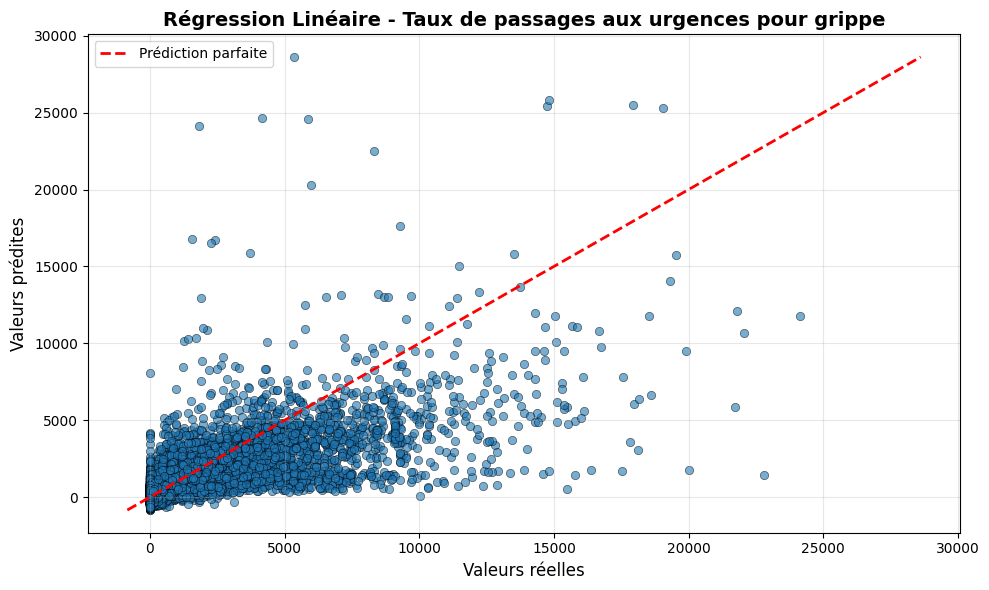


Calcul de la learning curve...

Calcul du score R² sur l'entraînement...

TEST D'OVERFITTING - RÉGRESSION LINÉAIRE
R² Score Entraînement: 0.5140
R² Score Test: 0.5152
Pas de signe fort d'overfitting.


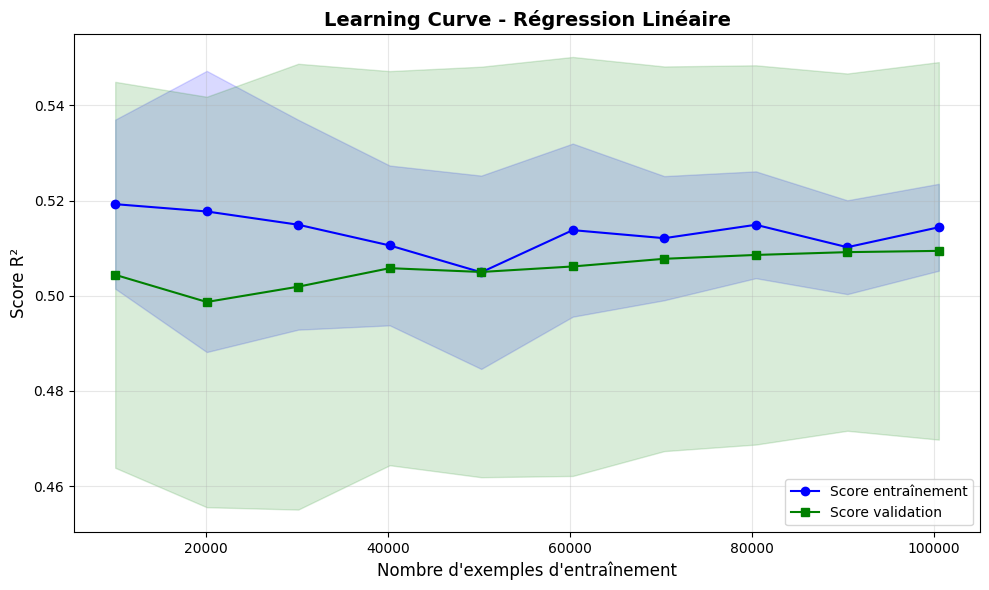


✓ Analyse terminée!


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# 2. SELECT FEATURES AND TARGET
target_col = "Taux de passages aux urgences pour grippe"

# Séparer features (X) et target (y)
y = dfUrg_fe[target_col]
X = dfUrg_fe.drop(columns=[target_col])

# Supprimer les colonnes inutiles
colonnes_a_supprimer = [
    '1er jour de la semaine',
    'Semaine',
    'Taux d\'hospitalisations après passages aux urgences pour grippe'
]
X = X.drop(columns=[col for col in colonnes_a_supprimer if col in X.columns])

print("Colonnes supprimées (duplication + datetime):", [col for col in colonnes_a_supprimer if col in dfUrg_fe.columns])

# Identifier les colonnes par type
numeric_features = X.select_dtypes(include=['int64', 'float64', 'UInt32']).columns.tolist()
categorical_features = X.select_dtypes(include=['category', 'object']).columns.tolist()

# CORRECTION: Convertir toutes les colonnes catégorielles en string pour éviter l'erreur
for col in categorical_features:
    X[col] = X[col].astype(str)

print(f"\nFeatures numériques: {numeric_features}")
print(f"Features catégorielles: {categorical_features}")
print(f"\nShape X: {X.shape}")
print(f"Shape y: {y.shape}")
print(f"\nValeurs manquantes dans X:\n{X.isnull().sum()}")

# TRAIN-TEST SPLIT
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, shuffle=True
)

print(f"\nTaille train: {X_train.shape}")
print(f"Taille test: {X_test.shape}")

# PIPELINE
# Preprocessing pour features numériques
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Preprocessing pour features catégorielles
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

# Column Transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# Pipeline complet avec Régression Linéaire
model = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

print("\n✓ Pipeline créé avec Régression Linéaire!")

# FIT
print("\nEntraînement du modèle...")
model.fit(X_train, y_train)
print("✓ Modèle entraîné!")

# PREDICT & METRICS
print("\nPrédictions sur l'ensemble de test...")
y_pred = model.predict(X_test)

# Calcul des métriques
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\n" + "="*50)
print("MÉTRIQUES DE PERFORMANCE")
print("="*50)
print(f"R² Score: {r2:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print("="*50)

# REGRESSION SCATTER PLOT
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6, edgecolors='k', linewidth=0.5)

# Ligne de régression parfaite
min_val = min(y_test.min(), y_pred.min())
max_val = max(y_test.max(), y_pred.max())
plt.plot([min_val, max_val], [min_val, max_val], 'r--', lw=2, label='Prédiction parfaite')

plt.xlabel('Valeurs réelles', fontsize=12)
plt.ylabel('Valeurs prédites', fontsize=12)
plt.title('Régression Linéaire - Taux de passages aux urgences pour grippe', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# LEARNING CURVE
print("\nCalcul de la learning curve...")
train_sizes, train_scores, val_scores = learning_curve(
    model, X_train, y_train,
    cv=5,
    n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10),
    scoring='r2',
    random_state=42
)

# Calcul des moyennes et std
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

# TEST D'OVERFITTING
print("\nCalcul du score R² sur l'entraînement...")
y_train_pred = model.predict(X_train)
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_pred)

print("\n" + "="*50)
print("TEST D'OVERFITTING - RÉGRESSION LINÉAIRE")
print("="*50)
print(f"R² Score Entraînement: {r2_train:.4f}")
print(f"R² Score Test: {r2_test:.4f}")
print("="*50)

if r2_train - r2_test > 0.1:
    print("Attention : le modèle risque de sur-apprendre (overfitting) !")
else:
    print("Pas de signe fort d'overfitting.")


# Plot learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Score entraînement', color='blue', marker='o')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.15, color='blue')

plt.plot(train_sizes, val_mean, label='Score validation', color='green', marker='s')
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, alpha=0.15, color='green')

plt.xlabel("Nombre d'exemples d'entraînement", fontsize=12)
plt.ylabel('Score R²', fontsize=12)
plt.title('Learning Curve - Régression Linéaire', fontsize=14, fontweight='bold')
plt.legend(loc='best')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("\n✓ Analyse terminée!")

## Random Forest AVEC Feature Engineering

🔧 RANDOM FOREST AVEC FEATURE ENGINEERING
Colonnes supprimées: ['1er jour de la semaine', "Taux d'hospitalisations après passages aux urgences pour grippe"]

Features numériques (13): ['year', 'mois', "Taux d'hospitalisations après passages aux urgences pour grippe.", 'Semaine_num', 'mois_sin', 'mois_cos', 'semaine_sin', 'semaine_cos', 'periode_grippe', 'year_mois', 'region_hosp_mean', 'age_hosp_mean', 'age_risque']
Features catégorielles (4): ['Département', "Classe d'âge", 'Région', 'saison']

Shape X: (157040, 17)
Shape y: (157040,)

Taille train: (125632, 17)
Taille test: (31408, 17)

✓ Pipeline créé avec Random Forest!

Entraînement du modèle...
✓ Modèle entraîné!

MÉTRIQUES DE PERFORMANCE - RANDOM FOREST + FE
R² Score: 0.7899
RMSE: 746.9164
MAE: 278.6082
MSE: 557884.1052

TEST D'OVERFITTING - RANDOM FOREST + FE
R² Score Entraînement: 0.9710
R² Score Test: 0.7899
Écart (Overfitting): 0.1811
⚠️  Attention : le modèle risque de sur-apprendre (overfitting) !


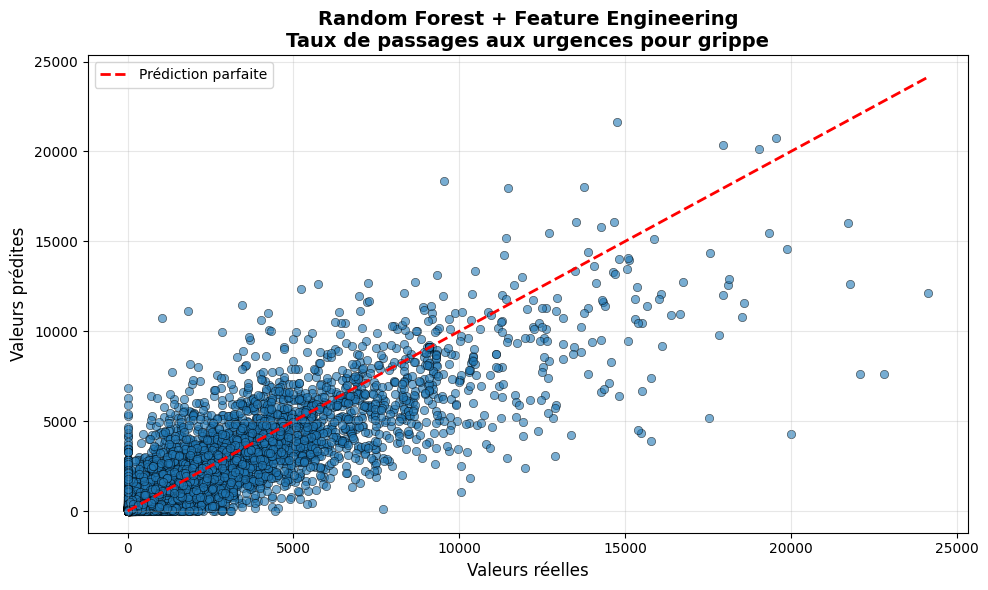


✓ Analyse terminée!

📊 COMPARAISON : Random Forest SANS vs AVEC Feature Engineering
SANS FE → R² = 0.7685
AVEC FE → R² = 0.7899
Gain   → 0.0214 (2.78%)


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

print("🔧 RANDOM FOREST AVEC FEATURE ENGINEERING")
print("="*60)

# SELECT FEATURES AND TARGET (avec dfUrg_fe qui contient les nouvelles features)
target_col = "Taux de passages aux urgences pour grippe"

y = dfUrg_fe[target_col]
X = dfUrg_fe.drop(columns=[target_col])

# Supprimer les colonnes inutiles
colonnes_a_supprimer = [
    '1er jour de la semaine',
    'Semaine',
    'Taux d\'hospitalisations après passages aux urgences pour grippe'  # Celle avec valeurs manquantes
]
X = X.drop(columns=[col for col in colonnes_a_supprimer if col in X.columns])

print(f"Colonnes supprimées: {[col for col in colonnes_a_supprimer if col in dfUrg_fe.columns]}")

# Identifier les colonnes par type
numeric_features = X.select_dtypes(include=['int64', 'float64', 'UInt32']).columns.tolist()
categorical_features = X.select_dtypes(include=['category', 'object']).columns.tolist()

# Convertir les catégorielles en string
for col in categorical_features:
    X[col] = X[col].astype(str)

print(f"\nFeatures numériques ({len(numeric_features)}): {numeric_features}")
print(f"Features catégorielles ({len(categorical_features)}): {categorical_features}")
print(f"\nShape X: {X.shape}")
print(f"Shape y: {y.shape}")

# TRAIN-TEST SPLIT
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, shuffle=True
)

print(f"\nTaille train: {X_train.shape}")
print(f"Taille test: {X_test.shape}")

# Pipeline avec Random Forest
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_features)
    ]
)

model_rf = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1))
])

print("\n✓ Pipeline créé avec Random Forest!")

# FIT
print("\nEntraînement du modèle...")
model_rf.fit(X_train, y_train)
print("✓ Modèle entraîné!")

# PREDICT & METRICS
y_pred_rf = model_rf.predict(X_test)

mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("\n" + "="*50)
print("MÉTRIQUES DE PERFORMANCE - RANDOM FOREST + FE")
print("="*50)
print(f"R² Score: {r2_rf:.4f}")
print(f"RMSE: {rmse_rf:.4f}")
print(f"MAE: {mae_rf:.4f}")
print(f"MSE: {mse_rf:.4f}")
print("="*50)

# TEST D'OVERFITTING
y_train_pred_rf = model_rf.predict(X_train)
r2_train_rf = r2_score(y_train, y_train_pred_rf)
r2_test_rf = r2_score(y_test, y_pred_rf)

print("\n" + "="*50)
print("TEST D'OVERFITTING - RANDOM FOREST + FE")
print("="*50)
print(f"R² Score Entraînement: {r2_train_rf:.4f}")
print(f"R² Score Test: {r2_test_rf:.4f}")
print(f"Écart (Overfitting): {(r2_train_rf - r2_test_rf):.4f}")
print("="*50)

if r2_train_rf - r2_test_rf > 0.1:
    print("⚠️  Attention : le modèle risque de sur-apprendre (overfitting) !")
else:
    print("✓ Pas de signe fort d'overfitting.")

# REGRESSION SCATTER PLOT
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.6, edgecolors='k', linewidth=0.5)
min_val = min(y_test.min(), y_pred_rf.min())
max_val = max(y_test.max(), y_pred_rf.max())
plt.plot([min_val, max_val], [min_val, max_val], 'r--', lw=2, label='Prédiction parfaite')
plt.xlabel('Valeurs réelles', fontsize=12)
plt.ylabel('Valeurs prédites', fontsize=12)
plt.title('Random Forest + Feature Engineering\nTaux de passages aux urgences pour grippe', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("\n✓ Analyse terminée!")

# COMPARAISON AVANT/APRÈS
print("\n" + "="*60)
print("📊 COMPARAISON : Random Forest SANS vs AVEC Feature Engineering")
print("="*60)
print("SANS FE → R² = 0.7685")
print(f"AVEC FE → R² = {r2_rf:.4f}")
print(f"Gain   → {(r2_rf - 0.7685):.4f} ({((r2_rf - 0.7685) / 0.7685 * 100):.2f}%)")
print("="*60)

## GRADIENT BOOSTING AVEC Feature Engineering

🔧 GRADIENT BOOSTING AVEC FEATURE ENGINEERING
Colonnes supprimées: ['1er jour de la semaine', "Taux d'hospitalisations après passages aux urgences pour grippe"]

Features numériques (13): ['year', 'mois', "Taux d'hospitalisations après passages aux urgences pour grippe.", 'Semaine_num', 'mois_sin', 'mois_cos', 'semaine_sin', 'semaine_cos', 'periode_grippe', 'year_mois', 'region_hosp_mean', 'age_hosp_mean', 'age_risque']
Features catégorielles (4): ['Département', "Classe d'âge", 'Région', 'saison']

Shape X: (157040, 17)
Shape y: (157040,)

Taille train: (125632, 17)
Taille test: (31408, 17)

✓ Pipeline créé avec Gradient Boosting!

Entraînement du modèle...
✓ Modèle entraîné!

MÉTRIQUES DE PERFORMANCE - GRADIENT BOOSTING + FE
R² Score: 0.6945
RMSE: 900.6899
MAE: 386.1811
MSE: 811242.3720

TEST D'OVERFITTING - GRADIENT BOOSTING + FE
R² Score Entraînement: 0.7031
R² Score Test: 0.6945
Écart (Overfitting): 0.0086
✓ Pas de signe fort d'overfitting.


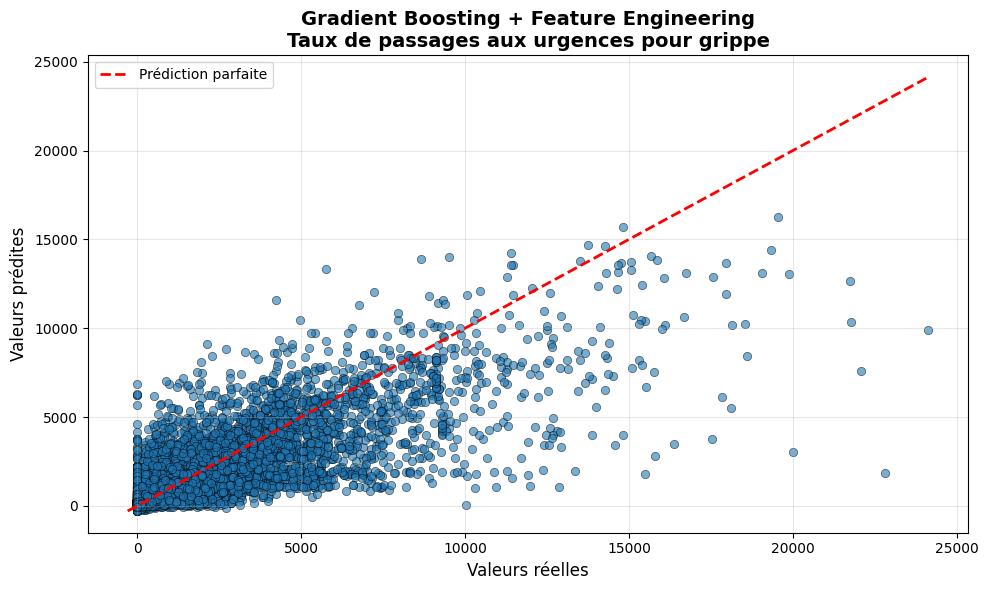


✓ Analyse terminée!

📊 COMPARAISON : Gradient Boosting SANS vs AVEC Feature Engineering
SANS FE → R² = 0.6643
AVEC FE → R² = 0.6945
Gain   → 0.0302 (4.54%)


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

print("🔧 GRADIENT BOOSTING AVEC FEATURE ENGINEERING")
print("="*60)

# SELECT FEATURES AND TARGET (avec dfUrg_fe qui contient les nouvelles features)
target_col = "Taux de passages aux urgences pour grippe"

y = dfUrg_fe[target_col]
X = dfUrg_fe.drop(columns=[target_col])

# Supprimer les colonnes inutiles
colonnes_a_supprimer = [
    '1er jour de la semaine',
    'Semaine',
    'Taux d\'hospitalisations après passages aux urgences pour grippe'
]
X = X.drop(columns=[col for col in colonnes_a_supprimer if col in X.columns])

print(f"Colonnes supprimées: {[col for col in colonnes_a_supprimer if col in dfUrg_fe.columns]}")

# Identifier les colonnes par type
numeric_features = X.select_dtypes(include=['int64', 'float64', 'UInt32']).columns.tolist()
categorical_features = X.select_dtypes(include=['category', 'object']).columns.tolist()

# Convertir les catégorielles en string
for col in categorical_features:
    X[col] = X[col].astype(str)

print(f"\nFeatures numériques ({len(numeric_features)}): {numeric_features}")
print(f"Features catégorielles ({len(categorical_features)}): {categorical_features}")
print(f"\nShape X: {X.shape}")
print(f"Shape y: {y.shape}")

# TRAIN-TEST SPLIT
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, shuffle=True
)

print(f"\nTaille train: {X_train.shape}")
print(f"Taille test: {X_test.shape}")

# Pipeline avec Gradient Boosting
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_features)
    ]
)

model_gb = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', GradientBoostingRegressor(n_estimators=100, random_state=42))
])

print("\n✓ Pipeline créé avec Gradient Boosting!")

# FIT
print("\nEntraînement du modèle...")
model_gb.fit(X_train, y_train)
print("✓ Modèle entraîné!")

# PREDICT & METRICS
y_pred_gb = model_gb.predict(X_test)

mse_gb = mean_squared_error(y_test, y_pred_gb)
rmse_gb = np.sqrt(mse_gb)
mae_gb = mean_absolute_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

print("\n" + "="*50)
print("MÉTRIQUES DE PERFORMANCE - GRADIENT BOOSTING + FE")
print("="*50)
print(f"R² Score: {r2_gb:.4f}")
print(f"RMSE: {rmse_gb:.4f}")
print(f"MAE: {mae_gb:.4f}")
print(f"MSE: {mse_gb:.4f}")
print("="*50)

# TEST D'OVERFITTING
y_train_pred_gb = model_gb.predict(X_train)
r2_train_gb = r2_score(y_train, y_train_pred_gb)
r2_test_gb = r2_score(y_test, y_pred_gb)

print("\n" + "="*50)
print("TEST D'OVERFITTING - GRADIENT BOOSTING + FE")
print("="*50)
print(f"R² Score Entraînement: {r2_train_gb:.4f}")
print(f"R² Score Test: {r2_test_gb:.4f}")
print(f"Écart (Overfitting): {(r2_train_gb - r2_test_gb):.4f}")
print("="*50)

if r2_train_gb - r2_test_gb > 0.1:
    print("⚠️  Attention : le modèle risque de sur-apprendre (overfitting) !")
else:
    print("✓ Pas de signe fort d'overfitting.")

# REGRESSION SCATTER PLOT
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_gb, alpha=0.6, edgecolors='k', linewidth=0.5)
min_val = min(y_test.min(), y_pred_gb.min())
max_val = max(y_test.max(), y_pred_gb.max())
plt.plot([min_val, max_val], [min_val, max_val], 'r--', lw=2, label='Prédiction parfaite')
plt.xlabel('Valeurs réelles', fontsize=12)
plt.ylabel('Valeurs prédites', fontsize=12)
plt.title('Gradient Boosting + Feature Engineering\nTaux de passages aux urgences pour grippe', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("\n✓ Analyse terminée!")

# COMPARAISON AVANT/APRÈS
print("\n" + "="*60)
print("📊 COMPARAISON : Gradient Boosting SANS vs AVEC Feature Engineering")
print("="*60)
print("SANS FE → R² = 0.6643")
print(f"AVEC FE → R² = {r2_gb:.4f}")
print(f"Gain   → {(r2_gb - 0.6643):.4f} ({((r2_gb - 0.6643) / 0.6643 * 100):.2f}%)")
print("="*60)

##  XGBoost AVEC Feature Engineering

🔧 MLP REGRESSOR AVEC FEATURE ENGINEERING
Colonnes supprimées: ['1er jour de la semaine', "Taux d'hospitalisations après passages aux urgences pour grippe"]

Features numériques (13): ['year', 'mois', "Taux d'hospitalisations après passages aux urgences pour grippe.", 'Semaine_num', 'mois_sin', 'mois_cos', 'semaine_sin', 'semaine_cos', 'periode_grippe', 'year_mois', 'region_hosp_mean', 'age_hosp_mean', 'age_risque']
Features catégorielles (4): ['Département', "Classe d'âge", 'Région', 'saison']

Shape X: (157040, 17)
Shape y: (157040,)

Taille train: (125632, 17)
Taille test: (31408, 17)

✓ Pipeline créé avec MLP Regressor!

Entraînement du modèle (verbose=True pour suivre la progression)...
------------------------------------------------------------
Iteration 1, loss = 1039461.36995272
Iteration 2, loss = 662243.33664540
Iteration 3, loss = 642229.14259165
Iteration 4, loss = 637034.17068774
Iteration 5, loss = 631775.99707230
Iteration 6, loss = 626345.47964320
Iteration 7, loss = 61

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(



MÉTRIQUES DE PERFORMANCE - MLP REGRESSOR + FE
R² Score: 0.8268
RMSE: 678.1745
MAE: 314.1125
MSE: 459920.6842

TEST D'OVERFITTING - MLP REGRESSOR + FE
R² Score Entraînement: 0.8927
R² Score Test: 0.8268
Écart (Overfitting): 0.0659
✓ Pas de signe fort d'overfitting.


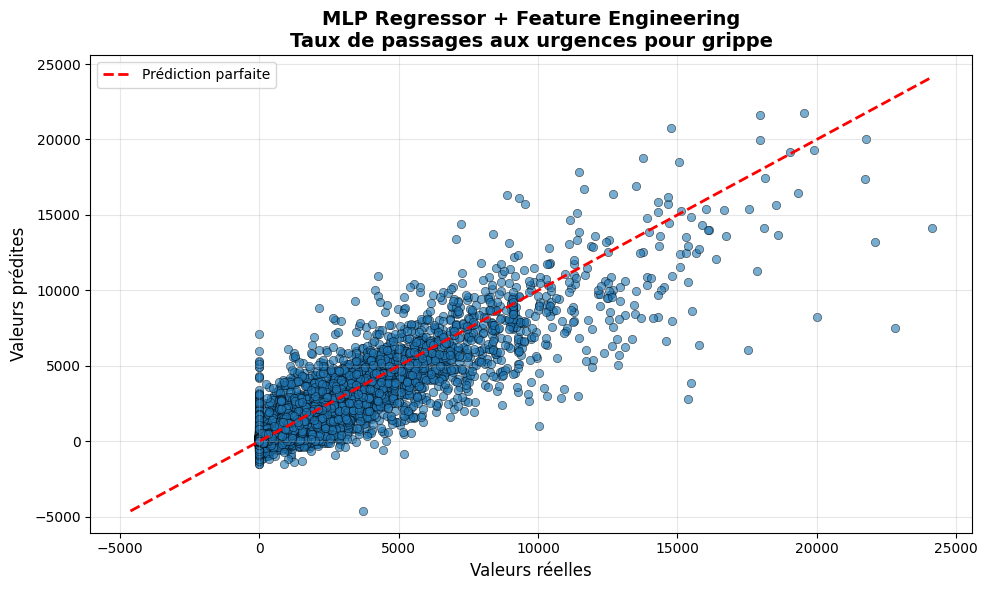


✓ Analyse terminée!

📊 COMPARAISON : MLP Regressor SANS vs AVEC Feature Engineering
SANS FE → R² = 0.7644
AVEC FE → R² = 0.8268
Gain   → 0.0624 (8.16%)


In [ ]:
from sklearn.neural_network import MLPRegressor
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

print("🔧 MLP REGRESSOR AVEC FEATURE ENGINEERING")
print("="*60)

# SELECT FEATURES AND TARGET (avec dfUrg_fe qui contient les nouvelles features)
target_col = "Taux de passages aux urgences pour grippe"

y = dfUrg_fe[target_col]
X = dfUrg_fe.drop(columns=[target_col])

# Supprimer les colonnes inutiles
colonnes_a_supprimer = [
    '1er jour de la semaine',
    'Semaine',
    'Taux d\'hospitalisations après passages aux urgences pour grippe'
]
X = X.drop(columns=[col for col in colonnes_a_supprimer if col in X.columns])

print(f"Colonnes supprimées: {[col for col in colonnes_a_supprimer if col in dfUrg_fe.columns]}")

# Identifier les colonnes par type
numeric_features = X.select_dtypes(include=['int64', 'float64', 'UInt32']).columns.tolist()
categorical_features = X.select_dtypes(include=['category', 'object']).columns.tolist()

# Convertir les catégorielles en string
for col in categorical_features:
    X[col] = X[col].astype(str)

print(f"\nFeatures numériques ({len(numeric_features)}): {numeric_features}")
print(f"Features catégorielles ({len(categorical_features)}): {categorical_features}")
print(f"\nShape X: {X.shape}")
print(f"Shape y: {y.shape}")

# TRAIN-TEST SPLIT
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, shuffle=True
)

print(f"\nTaille train: {X_train.shape}")
print(f"Taille test: {X_test.shape}")

# Pipeline avec MLP
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_features)
    ]
)

model_mlp = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', MLPRegressor(
        hidden_layer_sizes=(100, 50),
        max_iter=500,
        random_state=42,
        verbose=True  # Affiche la progression en temps réel
    ))
])

print("\n✓ Pipeline créé avec MLP Regressor!")

# FIT
print("\nEntraînement du modèle (verbose=True pour suivre la progression)...")
print("-" * 60)
model_mlp.fit(X_train, y_train)
print("-" * 60)
print("✓ Modèle entraîné!")

# PREDICT & METRICS
print("\nPrédictions sur l'ensemble de test...")
y_pred_mlp = model_mlp.predict(X_test)

mse_mlp = mean_squared_error(y_test, y_pred_mlp)
rmse_mlp = np.sqrt(mse_mlp)
mae_mlp = mean_absolute_error(y_test, y_pred_mlp)
r2_mlp = r2_score(y_test, y_pred_mlp)

print("\n" + "="*50)
print("MÉTRIQUES DE PERFORMANCE - MLP REGRESSOR + FE")
print("="*50)
print(f"R² Score: {r2_mlp:.4f}")
print(f"RMSE: {rmse_mlp:.4f}")
print(f"MAE: {mae_mlp:.4f}")
print(f"MSE: {mse_mlp:.4f}")
print("="*50)

# TEST D'OVERFITTING
y_train_pred_mlp = model_mlp.predict(X_train)
r2_train_mlp = r2_score(y_train, y_train_pred_mlp)
r2_test_mlp = r2_score(y_test, y_pred_mlp)

print("\n" + "="*50)
print("TEST D'OVERFITTING - MLP REGRESSOR + FE")
print("="*50)
print(f"R² Score Entraînement: {r2_train_mlp:.4f}")
print(f"R² Score Test: {r2_test_mlp:.4f}")
print(f"Écart (Overfitting): {(r2_train_mlp - r2_test_mlp):.4f}")
print("="*50)

if r2_train_mlp - r2_test_mlp > 0.1:
    print("⚠️  Attention : le modèle risque de sur-apprendre (overfitting) !")
else:
    print("✓ Pas de signe fort d'overfitting.")

# REGRESSION SCATTER PLOT
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_mlp, alpha=0.6, edgecolors='k', linewidth=0.5)
min_val = min(y_test.min(), y_pred_mlp.min())
max_val = max(y_test.max(), y_pred_mlp.max())
plt.plot([min_val, max_val], [min_val, max_val], 'r--', lw=2, label='Prédiction parfaite')
plt.xlabel('Valeurs réelles', fontsize=12)
plt.ylabel('Valeurs prédites', fontsize=12)
plt.title('MLP Regressor + Feature Engineering\nTaux de passages aux urgences pour grippe', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("\n✓ Analyse terminée!")

# COMPARAISON AVANT/APRÈS
print("\n" + "="*60)
print("📊 COMPARAISON : MLP Regressor SANS vs AVEC Feature Engineering")
print("="*60)
print("SANS FE → R² = 0.7644")
print(f"AVEC FE → R² = {r2_mlp:.4f}")
print(f"Gain   → {(r2_mlp - 0.7644):.4f} ({((r2_mlp - 0.7644) / 0.7644 * 100):.2f}%)")
print("="*60)

## XGBoost AVEC Feature Engineering

🔧 XGBOOST AVEC FEATURE ENGINEERING
Colonnes supprimées: ['1er jour de la semaine', "Taux d'hospitalisations après passages aux urgences pour grippe"]

Features numériques (13): ['year', 'mois', "Taux d'hospitalisations après passages aux urgences pour grippe.", 'Semaine_num', 'mois_sin', 'mois_cos', 'semaine_sin', 'semaine_cos', 'periode_grippe', 'year_mois', 'region_hosp_mean', 'age_hosp_mean', 'age_risque']
Features catégorielles (4): ['Département', "Classe d'âge", 'Région', 'saison']

Shape X: (157040, 17)
Shape y: (157040,)

Taille train: (125632, 17)
Taille test: (31408, 17)

✓ Pipeline créé avec XGBoost!

Entraînement du modèle...
✓ Modèle entraîné!

MÉTRIQUES DE PERFORMANCE - XGBOOST + FE
R² Score: 0.8134
RMSE: 703.9640
MAE: 285.5303
MSE: 495565.3804

TEST D'OVERFITTING - XGBOOST + FE
R² Score Entraînement: 0.8867
R² Score Test: 0.8134
Écart (Overfitting): 0.0734
✓ Pas de signe fort d'overfitting.


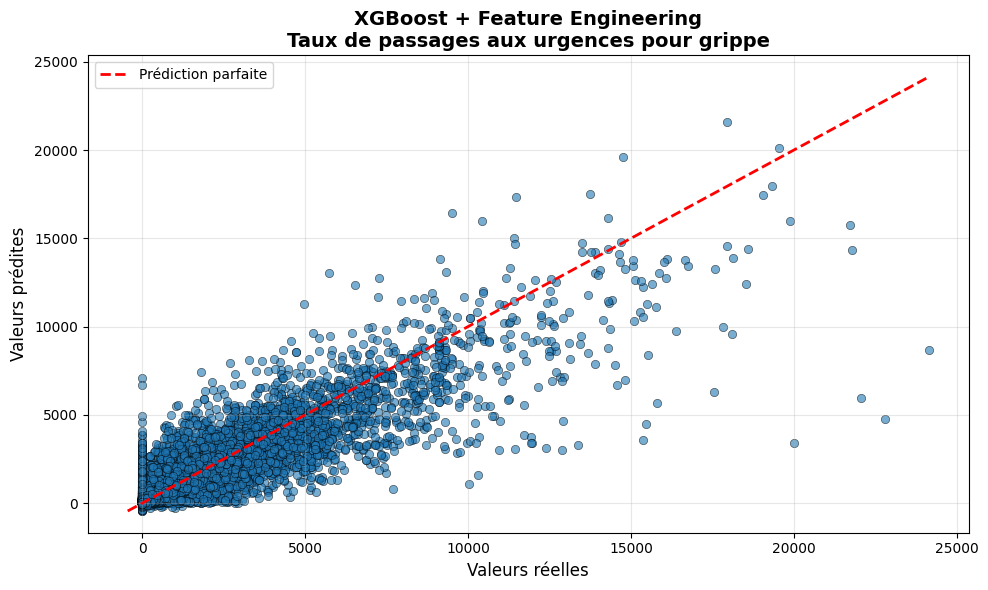


✓ Analyse terminée!

📊 COMPARAISON : XGBoost SANS vs AVEC Feature Engineering
SANS FE → R² = 0.7955
AVEC FE → R² = 0.8134
Gain   → 0.0179 (2.25%)


In [ ]:
from xgboost import XGBRegressor
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

print("🔧 XGBOOST AVEC FEATURE ENGINEERING")
print("="*60)

# SELECT FEATURES AND TARGET (avec dfUrg_fe qui contient les nouvelles features)
target_col = "Taux de passages aux urgences pour grippe"

y = dfUrg_fe[target_col]
X = dfUrg_fe.drop(columns=[target_col])

# Supprimer les colonnes inutiles
colonnes_a_supprimer = [
    '1er jour de la semaine',
    'Semaine',
    'Taux d\'hospitalisations après passages aux urgences pour grippe'
]
X = X.drop(columns=[col for col in colonnes_a_supprimer if col in X.columns])

print(f"Colonnes supprimées: {[col for col in colonnes_a_supprimer if col in dfUrg_fe.columns]}")

# Identifier les colonnes par type
numeric_features = X.select_dtypes(include=['int64', 'float64', 'UInt32']).columns.tolist()
categorical_features = X.select_dtypes(include=['category', 'object']).columns.tolist()

# Convertir les catégorielles en string
for col in categorical_features:
    X[col] = X[col].astype(str)

print(f"\nFeatures numériques ({len(numeric_features)}): {numeric_features}")
print(f"Features catégorielles ({len(categorical_features)}): {categorical_features}")
print(f"\nShape X: {X.shape}")
print(f"Shape y: {y.shape}")

# TRAIN-TEST SPLIT
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, shuffle=True
)

print(f"\nTaille train: {X_train.shape}")
print(f"Taille test: {X_test.shape}")

# Pipeline avec XGBoost
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_features)
    ]
)

model_xgb = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', XGBRegressor(
        n_estimators=200,
        max_depth=8,
        learning_rate=0.1,
        random_state=42,
        n_jobs=-1
    ))
])

print("\n✓ Pipeline créé avec XGBoost!")

# FIT
print("\nEntraînement du modèle...")
model_xgb.fit(X_train, y_train)
print("✓ Modèle entraîné!")

# PREDICT & METRICS
y_pred_xgb = model_xgb.predict(X_test)

mse_xgb = mean_squared_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mse_xgb)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print("\n" + "="*50)
print("MÉTRIQUES DE PERFORMANCE - XGBOOST + FE")
print("="*50)
print(f"R² Score: {r2_xgb:.4f}")
print(f"RMSE: {rmse_xgb:.4f}")
print(f"MAE: {mae_xgb:.4f}")
print(f"MSE: {mse_xgb:.4f}")
print("="*50)

# TEST D'OVERFITTING
y_train_pred_xgb = model_xgb.predict(X_train)
r2_train_xgb = r2_score(y_train, y_train_pred_xgb)
r2_test_xgb = r2_score(y_test, y_pred_xgb)

print("\n" + "="*50)
print("TEST D'OVERFITTING - XGBOOST + FE")
print("="*50)
print(f"R² Score Entraînement: {r2_train_xgb:.4f}")
print(f"R² Score Test: {r2_test_xgb:.4f}")
print(f"Écart (Overfitting): {(r2_train_xgb - r2_test_xgb):.4f}")
print("="*50)

if r2_train_xgb - r2_test_xgb > 0.1:
    print("⚠️  Attention : le modèle risque de sur-apprendre (overfitting) !")
else:
    print("✓ Pas de signe fort d'overfitting.")

# REGRESSION SCATTER PLOT
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_xgb, alpha=0.6, edgecolors='k', linewidth=0.5)
min_val = min(y_test.min(), y_pred_xgb.min())
max_val = max(y_test.max(), y_pred_xgb.max())
plt.plot([min_val, max_val], [min_val, max_val], 'r--', lw=2, label='Prédiction parfaite')
plt.xlabel('Valeurs réelles', fontsize=12)
plt.ylabel('Valeurs prédites', fontsize=12)
plt.title('XGBoost + Feature Engineering\nTaux de passages aux urgences pour grippe', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("\n✓ Analyse terminée!")

# COMPARAISON AVANT/APRÈS
print("\n" + "="*60)
print("📊 COMPARAISON : XGBoost SANS vs AVEC Feature Engineering")
print("="*60)
print("SANS FE → R² = 0.7955")
print(f"AVEC FE → R² = {r2_xgb:.4f}")
print(f"Gain   → {(r2_xgb - 0.7955):.4f} ({((r2_xgb - 0.7955) / 0.7955 * 100):.2f}%)")
print("="*60)

## Hyprparam test

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tqdm import tqdm

print("🔍 RANDOMIZED SEARCH - OPTIMISATION DES 4 MODÈLES")
print("="*70)

# Préparer les données avec Feature Engineering
target_col = "Taux de passages aux urgences pour grippe"
y = dfUrg_fe[target_col]
X = dfUrg_fe.drop(columns=[target_col])

# Supprimer colonnes inutiles
colonnes_a_supprimer = [
    '1er jour de la semaine',
    'Semaine',
    'Taux d\'hospitalisations après passages aux urgences pour grippe'
]
X = X.drop(columns=[col for col in colonnes_a_supprimer if col in X.columns])

# Identifier features
numeric_features = X.select_dtypes(include=['int64', 'float64', 'UInt32']).columns.tolist()
categorical_features = X.select_dtypes(include=['category', 'object']).columns.tolist()

# Convertir catégorielles
for col in categorical_features:
    X[col] = X[col].astype(str)

# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, shuffle=True
)

# Preprocessor commun
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_features)
    ]
)

# ============================================================
# DÉFINITION DES GRILLES DE PARAMÈTRES
# ============================================================

# 1. Random Forest
param_grid_rf = {
    'regressor__n_estimators': [100, 200, 300],
    'regressor__max_depth': [10, 15, 20, None],
    'regressor__min_samples_split': [2, 5, 10],
    'regressor__min_samples_leaf': [1, 2, 4],
    'regressor__max_features': ['sqrt', 'log2']
}

# 2. Gradient Boosting
param_grid_gb = {
    'regressor__n_estimators': [100, 200, 300],
    'regressor__max_depth': [3, 5, 7],
    'regressor__learning_rate': [0.01, 0.05, 0.1],
    'regressor__min_samples_split': [2, 5, 10],
    'regressor__subsample': [0.8, 0.9, 1.0]
}

# 3. XGBoost
param_grid_xgb = {
    'regressor__n_estimators': [100, 200, 300],
    'regressor__max_depth': [3, 5, 7, 9],
    'regressor__learning_rate': [0.01, 0.05, 0.1],
    'regressor__subsample': [0.7, 0.8, 0.9],
    'regressor__colsample_bytree': [0.7, 0.8, 0.9],
    'regressor__min_child_weight': [1, 3, 5],
    'regressor__reg_alpha': [0, 0.1, 0.5],
    'regressor__reg_lambda': [0.5, 1.0, 1.5]
}

# 4. MLP
param_grid_mlp = {
    'regressor__hidden_layer_sizes': [(100,), (100, 50), (150, 75), (200, 100)],
    'regressor__activation': ['relu', 'tanh'],
    'regressor__alpha': [0.0001, 0.001, 0.01],
    'regressor__learning_rate_init': [0.001, 0.01],
    'regressor__max_iter': [300, 500]
}

# ============================================================
# FONCTION POUR LANCER RANDOMIZED SEARCH
# ============================================================

def run_randomized_search(model_name, base_estimator, param_grid, n_iter=20, pbar=None):
    print(f"\n{'='*70}")
    print(f"🚀 {model_name}")
    print(f"{'='*70}")

    # Créer pipeline
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', base_estimator)
    ])

    # RandomizedSearchCV
    random_search = RandomizedSearchCV(
        pipeline,
        param_distributions=param_grid,
        n_iter=n_iter,
        cv=3,
        scoring='r2',
        n_jobs=-1,
        random_state=42,
        verbose=1  # Réduit à 1 pour ne pas polluer tqdm
    )

    # Fit
    print(f"Optimisation en cours ({n_iter} combinaisons, CV=3)...")
    random_search.fit(X_train, y_train)

    # Meilleur modèle
    best_model = random_search.best_estimator_

    # Prédictions
    y_train_pred = best_model.predict(X_train)
    y_test_pred = best_model.predict(X_test)

    # Scores
    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)

    print(f"\n✓ Optimisation terminée!")
    print(f"Meilleurs paramètres: {random_search.best_params_}")
    print(f"R² Train: {r2_train:.4f}")
    print(f"R² Test: {r2_test:.4f}")
    print(f"Écart (Overfitting): {(r2_train - r2_test):.4f}")

    # Mettre à jour tqdm
    if pbar is not None:
        pbar.update(1)

    return {
        'model_name': model_name,
        'r2_train': r2_train,
        'r2_test': r2_test,
        'best_params': random_search.best_params_,
        'best_model': best_model
    }

# ============================================================
# LANCER LES 4 OPTIMISATIONS AVEC TQDM
# ============================================================

# Liste des modèles à optimiser
models_config = [
    ("Random Forest", RandomForestRegressor(random_state=42, n_jobs=-1), param_grid_rf, 20),
    ("Gradient Boosting", GradientBoostingRegressor(random_state=42), param_grid_gb, 20),
    ("XGBoost", XGBRegressor(random_state=42, n_jobs=-1), param_grid_xgb, 20),
    ("MLP Neural Network", MLPRegressor(random_state=42), param_grid_mlp, 15)
]

results = []

# Barre de progression principale
with tqdm(total=len(models_config), desc="🔍 Optimisation globale", unit="modèle",
          bar_format='{l_bar}{bar}| {n_fmt}/{total_fmt} modèles [{elapsed}<{remaining}]') as pbar:

    for model_name, base_estimator, param_grid, n_iter in models_config:
        result = run_randomized_search(model_name, base_estimator, param_grid, n_iter, pbar)
        results.append(result)

# ============================================================
# GRAPHIQUE COMPARATIF R² TRAIN VS TEST
# ============================================================

print("\n" + "="*70)
print("📊 CRÉATION DU GRAPHIQUE COMPARATIF")
print("="*70)

# Extraire les données
model_names = [r['model_name'] for r in results]
r2_trains = [r['r2_train'] for r in results]
r2_tests = [r['r2_test'] for r in results]
ecarts = [r['r2_train'] - r['r2_test'] for r in results]

# Créer le graphique
fig, ax = plt.subplots(figsize=(14, 8))

x = np.arange(len(model_names))
width = 0.35

# Barres
bars1 = ax.bar(x - width/2, r2_trains, width, label='R² Train',
               color='#FF6B6B', alpha=0.8, edgecolor='black', linewidth=1.2)
bars2 = ax.bar(x + width/2, r2_tests, width, label='R² Test',
               color='#4ECDC4', alpha=0.8, edgecolor='black', linewidth=1.2)

# Ligne de référence à 0.95
ax.axhline(y=0.95, color='gray', linestyle='--', linewidth=1.5, alpha=0.7, label='Référence (0.95)')

# Labels et titre
ax.set_xlabel('Modèles', fontsize=13, fontweight='bold')
ax.set_ylabel('Score R²', fontsize=13, fontweight='bold')
ax.set_title('Comparaison R² Train vs R² Test - Analyse du Surapprentissage\nTaux de passages aux urgences pour grippe',
             fontsize=15, fontweight='bold', pad=20)
ax.set_xticks(x)
ax.set_xticklabels(model_names, fontsize=11)
ax.legend(fontsize=11, loc='lower right')
ax.grid(True, alpha=0.3, axis='y')

# Annotations sur les barres
for i, (bar1, bar2) in enumerate(zip(bars1, bars2)):
    # R² Train
    height1 = bar1.get_height()
    ax.text(bar1.get_x() + bar1.get_width()/2., height1,
            f'{height1:.3f}',
            ha='center', va='bottom', fontsize=9, fontweight='bold')

    # R² Test
    height2 = bar2.get_height()
    ax.text(bar2.get_x() + bar2.get_width()/2., height2,
            f'{height2:.3f}',
            ha='center', va='bottom', fontsize=9, fontweight='bold')

    # Annotation d'écart (overfitting)
    ecart = ecarts[i]
    if ecart > 0.1:
        ax.annotate('Léger surapprentissage',
                   xy=(i, max(height1, height2) + 0.01),
                   xytext=(i, max(height1, height2) + 0.05),
                   ha='center', fontsize=8,
                   bbox=dict(boxstyle='round,pad=0.3', facecolor='orange', alpha=0.7),
                   arrowprops=dict(arrowstyle='->', color='black', lw=1))
    elif ecart < 0.05:
        ax.annotate('Bonne généralisation',
                   xy=(i, max(height1, height2) + 0.01),
                   xytext=(i, max(height1, height2) + 0.05),
                   ha='center', fontsize=8,
                   bbox=dict(boxstyle='round,pad=0.3', facecolor='lightgreen', alpha=0.7))

# Zone de surapprentissage (fond rose)
ax.axhspan(0.85, 1.05, alpha=0.05, color='red', zorder=0)

# Identifier le meilleur modèle
best_idx = np.argmax(r2_tests)
ax.annotate(f'Meilleur modèle (R² test): {model_names[best_idx]}\n∆={ecarts[best_idx]:.3f}',
           xy=(best_idx, r2_tests[best_idx]),
           xytext=(best_idx + 0.5, r2_tests[best_idx] + 0.08),
           ha='left', fontsize=9, fontweight='bold',
           bbox=dict(boxstyle='round,pad=0.5', facecolor='yellow', alpha=0.8),
           arrowprops=dict(arrowstyle='->', color='black', lw=1.5))

plt.tight_layout()
plt.show()

# ============================================================
# TABLEAU RÉCAPITULATIF
# ============================================================

print("\n" + "="*70)
print("📋 TABLEAU RÉCAPITULATIF DES RÉSULTATS")
print("="*70)

df_results = pd.DataFrame({
    'Modèle': model_names,
    'R² Train': r2_trains,
    'R² Test': r2_tests,
    'Écart (Overfitting)': ecarts
})

df_results = df_results.sort_values('R² Test', ascending=False).reset_index(drop=True)
print(df_results.to_string(index=False))
print("="*70)

print(f"\n🏆 MEILLEUR MODÈLE: {df_results.iloc[0]['Modèle']} (R² Test = {df_results.iloc[0]['R² Test']:.4f})")
print(f"✓ Optimisation terminée avec succès!")

KeyboardInterrupt: 

## Mlflow

In [ ]:
!pip install mlflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.4/80.4 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.8/8.8 MB 46.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 37.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 26.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 329.1/329.1 kB 15.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.9/114.9 kB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.8/178.8 kB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 749.8/749.8 kB 42.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.4/203.4 kB 14.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 167.3/167.3 kB 11.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10

In [ ]:
import mlflow
import mlflow.sklearn
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime

print("🔍 MLFLOW - TRACKING ET SAUVEGARDE DES MODÈLES")
print("="*70)

# ============================================================
# CONFIGURATION MLFLOW
# ============================================================

# Définir l'URI de tracking (local par défaut)
mlflow.set_tracking_uri("file:./mlruns")

# Créer ou utiliser une expérience
experiment_name = "Grippe_Urgences_Prediction"
mlflow.set_experiment(experiment_name)

print(f"✓ Expérience MLflow: {experiment_name}")
print(f"✓ Tracking URI: {mlflow.get_tracking_uri()}")

# ============================================================
# PRÉPARATION DES DONNÉES
# ============================================================

target_col = "Taux de passages aux urgences pour grippe"
y = dfUrg_fe[target_col]
X = dfUrg_fe.drop(columns=[target_col])

# Supprimer colonnes inutiles
colonnes_a_supprimer = [
    '1er jour de la semaine',
    'Semaine',
    'Taux d\'hospitalisations après passages aux urgences pour grippe'
]
X = X.drop(columns=[col for col in colonnes_a_supprimer if col in X.columns])

# Identifier features
numeric_features = X.select_dtypes(include=['int64', 'float64', 'UInt32']).columns.tolist()
categorical_features = X.select_dtypes(include=['category', 'object']).columns.tolist()

# Convertir catégorielles
for col in categorical_features:
    X[col] = X[col].astype(str)

print(f"\nShape X: {X.shape}")
print(f"Shape y: {y.shape}")

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, shuffle=True
)

print(f"Taille train: {X_train.shape}")
print(f"Taille test: {X_test.shape}")

# Preprocessor commun
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_features)
    ]
)

# ============================================================
# FONCTION POUR ENTRAÎNER ET LOGGER UN MODÈLE
# ============================================================

def train_and_log_model(model_name, base_estimator, model_params=None):
    """
    Entraîne un modèle, log les métriques dans MLflow et sauvegarde le modèle
    """

    with mlflow.start_run(run_name=model_name):

        print(f"\n{'='*70}")
        print(f"🚀 {model_name}")
        print(f"{'='*70}")

        # Créer pipeline
        pipeline = Pipeline([
            ('preprocessor', preprocessor),
            ('regressor', base_estimator)
        ])

        # Entraînement
        print("Entraînement en cours...")
        start_time = datetime.now()
        pipeline.fit(X_train, y_train)
        training_time = (datetime.now() - start_time).total_seconds()
        print(f"✓ Entraînement terminé en {training_time:.2f}s")

        # Prédictions
        y_train_pred = pipeline.predict(X_train)
        y_test_pred = pipeline.predict(X_test)

        # Métriques
        r2_train = r2_score(y_train, y_train_pred)
        r2_test = r2_score(y_test, y_test_pred)
        rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
        rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
        mae_train = mean_absolute_error(y_train, y_train_pred)
        mae_test = mean_absolute_error(y_test, y_test_pred)
        overfitting = r2_train - r2_test

        print(f"\nMétriques:")
        print(f"  R² Train: {r2_train:.4f}")
        print(f"  R² Test: {r2_test:.4f}")
        print(f"  RMSE Test: {rmse_test:.4f}")
        print(f"  MAE Test: {mae_test:.4f}")
        print(f"  Overfitting: {overfitting:.4f}")

        # ============================================================
        # LOGGING DANS MLFLOW
        # ============================================================

        # 1. Log des paramètres du modèle
        if model_params:
            for param_name, param_value in model_params.items():
                mlflow.log_param(param_name, param_value)

        # 2. Log des métadonnées
        mlflow.log_param("model_type", model_name)
        mlflow.log_param("n_features", X_train.shape[1])
        mlflow.log_param("n_samples_train", X_train.shape[0])
        mlflow.log_param("n_samples_test", X_test.shape[0])
        mlflow.log_param("feature_engineering", "Yes")
        mlflow.log_param("training_time_seconds", training_time)

        # 3. Log des métriques
        mlflow.log_metric("r2_train", r2_train)
        mlflow.log_metric("r2_test", r2_test)
        mlflow.log_metric("rmse_train", rmse_train)
        mlflow.log_metric("rmse_test", rmse_test)
        mlflow.log_metric("mae_train", mae_train)
        mlflow.log_metric("mae_test", mae_test)
        mlflow.log_metric("overfitting", overfitting)

        # 4. Créer et logger le scatter plot
        fig, ax = plt.subplots(figsize=(10, 6))
        ax.scatter(y_test, y_test_pred, alpha=0.6, edgecolors='k', linewidth=0.5)
        min_val = min(y_test.min(), y_test_pred.min())
        max_val = max(y_test.max(), y_test_pred.max())
        ax.plot([min_val, max_val], [min_val, max_val], 'r--', lw=2, label='Prédiction parfaite')
        ax.set_xlabel('Valeurs réelles', fontsize=12)
        ax.set_ylabel('Valeurs prédites', fontsize=12)
        ax.set_title(f'{model_name} - Prédiction vs Réalité\nR² = {r2_test:.4f}',
                     fontsize=14, fontweight='bold')
        ax.legend()
        ax.grid(True, alpha=0.3)
        plt.tight_layout()

        # Sauvegarder et logger le graphique
        plot_path = f"scatter_plot_{model_name.replace(' ', '_')}.png"
        plt.savefig(plot_path, dpi=150, bbox_inches='tight')
        mlflow.log_artifact(plot_path)
        plt.close()

        # 5. Sauvegarder et logger le modèle
        mlflow.sklearn.log_model(
            pipeline,
            "model",
            registered_model_name=f"{model_name}_grippe"
        )

        print(f"✓ Modèle sauvegardé dans MLflow")
        print(f"✓ Run ID: {mlflow.active_run().info.run_id}")

        return {
            'model_name': model_name,
            'r2_train': r2_train,
            'r2_test': r2_test,
            'rmse_test': rmse_test,
            'mae_test': mae_test,
            'overfitting': overfitting,
            'run_id': mlflow.active_run().info.run_id
        }

# ============================================================
# ENTRAÎNER ET LOGGER LES 4 MODÈLES
# ============================================================

results = []

# 1. Random Forest
print("\n" + "="*70)
print("MODÈLE 1/4: Random Forest")
print("="*70)
rf_params = {
    'n_estimators': 100,
    'max_depth': None,
    'min_samples_split': 2,
    'min_samples_leaf': 1,
    'random_state': 42,
    'n_jobs': -1
}
results.append(train_and_log_model(
    "Random Forest",
    RandomForestRegressor(**rf_params),
    rf_params
))

# 2. Gradient Boosting
print("\n" + "="*70)
print("MODÈLE 2/4: Gradient Boosting")
print("="*70)
gb_params = {
    'n_estimators': 100,
    'max_depth': 5,
    'learning_rate': 0.1,
    'random_state': 42
}
results.append(train_and_log_model(
    "Gradient Boosting",
    GradientBoostingRegressor(**gb_params),
    gb_params
))

# 3. XGBoost
print("\n" + "="*70)
print("MODÈLE 3/4: XGBoost")
print("="*70)
xgb_params = {
    'n_estimators': 200,
    'max_depth': 8,
    'learning_rate': 0.1,
    'random_state': 42,
    'n_jobs': -1
}
results.append(train_and_log_model(
    "XGBoost",
    XGBRegressor(**xgb_params),
    xgb_params
))

# 4. MLP Neural Network
print("\n" + "="*70)
print("MODÈLE 4/4: MLP Neural Network")
print("="*70)
mlp_params = {
    'hidden_layer_sizes': (100, 50),
    'max_iter': 500,
    'random_state': 42
}
results.append(train_and_log_model(
    "MLP Neural Network",
    MLPRegressor(**mlp_params),
    mlp_params
))

# ============================================================
# TABLEAU RÉCAPITULATIF
# ============================================================

print("\n" + "="*70)
print("📋 TABLEAU RÉCAPITULATIF DES RÉSULTATS")
print("="*70)

df_results = pd.DataFrame({
    'Modèle': [r['model_name'] for r in results],
    'R² Train': [r['r2_train'] for r in results],
    'R² Test': [r['r2_test'] for r in results],
    'RMSE Test': [r['rmse_test'] for r in results],
    'MAE Test': [r['mae_test'] for r in results],
    'Overfitting': [r['overfitting'] for r in results],
    'Run ID': [r['run_id'] for r in results]
})

df_results = df_results.sort_values('R² Test', ascending=False).reset_index(drop=True)
print(df_results.to_string(index=False))
print("="*70)

best_model = df_results.iloc[0]
print(f"\n🏆 MEILLEUR MODÈLE: {best_model['Modèle']}")
print(f"   R² Test: {best_model['R² Test']:.4f}")
print(f"   RMSE Test: {best_model['RMSE Test']:.4f}")
print(f"   Run ID: {best_model['Run ID']}")

# ============================================================
# INSTRUCTIONS POUR ACCÉDER AUX MODÈLES
# ============================================================

print("\n" + "="*70)
print("📦 COMMENT ACCÉDER AUX MODÈLES SAUVEGARDÉS")
print("="*70)
print("\n1. Lancer l'interface MLflow UI:")
print("   !mlflow ui --port 5000")
print("   Puis ouvrir: http://localhost:5000")
print("\n2. Charger un modèle sauvegardé:")
print(f"   model = mlflow.sklearn.load_model('runs:/{best_model['Run ID']}/model')")
print("\n3. Faire des prédictions:")
print("   predictions = model.predict(X_new)")
print("="*70)

print("\n✓ Tous les modèles ont été entraînés et sauvegardés avec succès!")

2025/10/22 05:27:23 INFO mlflow.tracking.fluent: Experiment with name 'Grippe_Urgences_Prediction' does not exist. Creating a new experiment.


🔍 MLFLOW - TRACKING ET SAUVEGARDE DES MODÈLES
✓ Expérience MLflow: Grippe_Urgences_Prediction
✓ Tracking URI: file:./mlruns

Shape X: (78308, 17)
Shape y: (78308,)
Taille train: (62646, 17)
Taille test: (15662, 17)

MODÈLE 1/4: Random Forest

🚀 Random Forest
Entraînement en cours...
✓ Entraînement terminé en 159.95s

Métriques:
  R² Train: 0.9631
  R² Test: 0.7259
  RMSE Test: 678.7166
  MAE Test: 239.4649
  Overfitting: 0.2373


2025/10/22 05:30:08 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/10/22 05:30:26 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
Successfully registered model 'Random Forest_grippe'.
Created version '1' of model 'Random Forest_grippe'.


✓ Modèle sauvegardé dans MLflow
✓ Run ID: 64d6ac5c77f24ccaaeae7d24de778365

MODÈLE 2/4: Gradient Boosting

🚀 Gradient Boosting
Entraînement en cours...
✓ Entraînement terminé en 89.19s

Métriques:
  R² Train: 0.7522
  R² Test: 0.6765
  RMSE Test: 737.3486
  MAE Test: 290.5883
  Overfitting: 0.0758


2025/10/22 05:31:59 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/10/22 05:32:04 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
Successfully registered model 'Gradient Boosting_grippe'.
Created version '1' of model 'Gradient Boosting_grippe'.


✓ Modèle sauvegardé dans MLflow
✓ Run ID: f92041d7c27d41408d64d8c9544de6a6

MODÈLE 3/4: XGBoost

🚀 XGBoost
Entraînement en cours...
✓ Entraînement terminé en 5.93s

Métriques:
  R² Train: 0.8862
  R² Test: 0.7410
  RMSE Test: 659.6644
  MAE Test: 252.5494
  Overfitting: 0.1452


2025/10/22 05:32:11 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/10/22 05:32:16 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
Successfully registered model 'XGBoost_grippe'.
Created version '1' of model 'XGBoost_grippe'.


✓ Modèle sauvegardé dans MLflow
✓ Run ID: 8a60caf45bde4e058f665b9a1c8617ec

MODÈLE 4/4: MLP Neural Network

🚀 MLP Neural Network
Entraînement en cours...


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


✓ Entraînement terminé en 557.70s

Métriques:
  R² Train: 0.8618
  R² Test: 0.7454
  RMSE Test: 654.1366
  MAE Test: 301.8018
  Overfitting: 0.1165


2025/10/22 05:41:35 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/10/22 05:41:40 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


✓ Modèle sauvegardé dans MLflow
✓ Run ID: 4090b01fc9124ab5a1404f7fb9e6ce4a

📋 TABLEAU RÉCAPITULATIF DES RÉSULTATS
            Modèle  R² Train  R² Test  RMSE Test   MAE Test  Overfitting                           Run ID
MLP Neural Network  0.861831 0.745360 654.136607 301.801773     0.116472 4090b01fc9124ab5a1404f7fb9e6ce4a
           XGBoost  0.886220 0.741038 659.664445 252.549429     0.145182 8a60caf45bde4e058f665b9a1c8617ec
     Random Forest  0.963133 0.725863 678.716624 239.464900     0.237270 64d6ac5c77f24ccaaeae7d24de778365
 Gradient Boosting  0.752220 0.676454 737.348613 290.588274     0.075766 f92041d7c27d41408d64d8c9544de6a6

🏆 MEILLEUR MODÈLE: MLP Neural Network
   R² Test: 0.7454
   RMSE Test: 654.1366
   Run ID: 4090b01fc9124ab5a1404f7fb9e6ce4a

📦 COMMENT ACCÉDER AUX MODÈLES SAUVEGARDÉS

1. Lancer l'interface MLflow UI:
   !mlflow ui --port 5000
   Puis ouvrir: http://localhost:5000

2. Charger un modèle sauvegardé:
   model = mlflow.sklearn.load_model('runs:/4090b01fc912

Successfully registered model 'MLP Neural Network_grippe'.
Created version '1' of model 'MLP Neural Network_grippe'.


In [ ]:
!mlflow ui --port 8000

/usr/local/lib/python3.12/dist-packages/pydantic/_internal/_config.py:323: PydanticDeprecatedSince20: Support for class-based `config` is deprecated, use ConfigDict instead. Deprecated in Pydantic V2.0 to be removed in V3.0. See Pydantic V2 Migration Guide at https://errors.pydantic.dev/2.11/migration/
  warnings.warn(DEPRECATION_MESSAGE, DeprecationWarning)
[MLflow] Security middleware enabled with default settings (localhost-only). To allow connections from other hosts, use --host 0.0.0.0 and configure --allowed-hosts and --cors-allowed-origins.
INFO:     Uvicorn running on http://127.0.0.1:8000 (Press CTRL+C to quit)
INFO:     Started parent process [25115]
INFO:     Started server process [25122]
INFO:     Waiting for application startup.
INFO:     Application startup complete.
INFO:     Started server process [25124]
INFO:     Waiting for application startup.
INFO:     Application startup complete.
INFO:     Started server process [25121]
INFO:     Waiting for application startup.

## diagno Srapprentissage

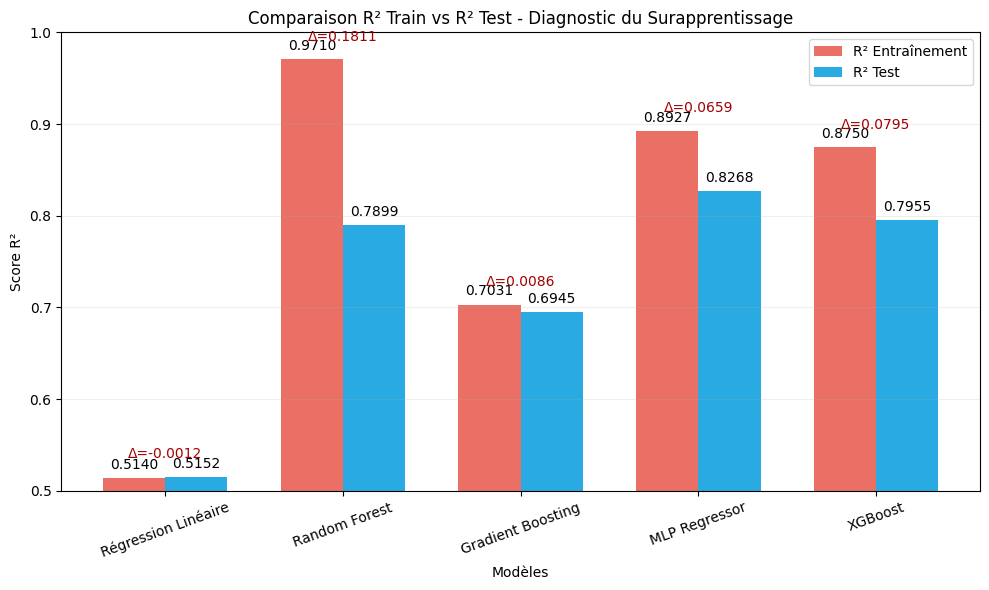

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Noms des modèles
model_names = [
    "Régression Linéaire",
    "Random Forest",
    "Gradient Boosting",
    "MLP Regressor",
    "XGBoost"
]

# Scores réels issus de tes calculs (avec Feature Engineering)
r2_train = [
    0.5140,   # Régression Linéaire
    0.9710,   # Random Forest
    0.7031,   # Gradient Boosting
    0.8927,   # MLP Regressor
    0.8750    # XGBoost
]

r2_test = [
    0.5152,   # Régression Linéaire
    0.7899,   # Random Forest
    0.6945,   # Gradient Boosting
    0.8268,   # MLP Regressor
    0.7955    # XGBoost
]

bar_width = 0.35
x = np.arange(len(model_names))
ecarts = np.array(r2_train) - np.array(r2_test)

plt.figure(figsize=(10, 6))

# Barres pour R² train et test
plt.bar(x - bar_width/2, r2_train, width=bar_width, color='#EA7066', label='R² Entraînement')
plt.bar(x + bar_width/2, r2_test, width=bar_width, color='#2AAAE2', label='R² Test')

# Affichage des valeurs de R² et de l'écart Δ
for i in range(len(model_names)):
    plt.text(x[i] - bar_width/2, r2_train[i] + 0.01, f"{r2_train[i]:.4f}", ha='center', color='black')
    plt.text(x[i] + bar_width/2, r2_test[i] + 0.01, f"{r2_test[i]:.4f}", ha='center', color='black')
    plt.text(x[i], max(r2_train[i], r2_test[i]) + 0.02, f"Δ={ecarts[i]:.4f}", ha='center', color='#A00000', fontsize=10)

plt.xticks(x, model_names, rotation=20)
plt.ylim(0.5, 1.0)
plt.ylabel("Score R²")
plt.xlabel("Modèles")
plt.title("Comparaison R² Train vs R² Test - Diagnostic du Surapprentissage")
plt.legend()
plt.grid(alpha=0.2, axis='y')
plt.tight_layout()
plt.show()


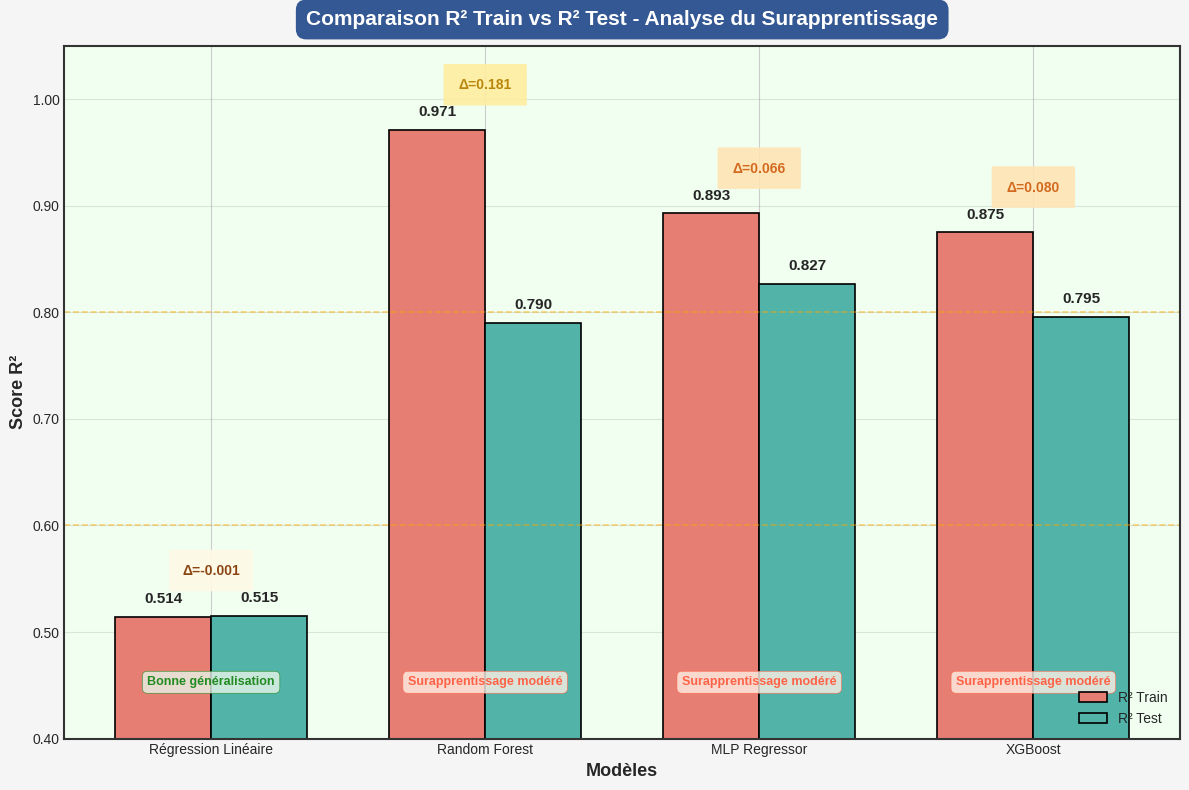

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

plt.style.use('seaborn-v0_8-whitegrid')

# Données finales sans Gradient Boosting
model_names = [
    "Régression Linéaire",
    "Random Forest",
    "MLP Regressor",
    "XGBoost"
]

r2_train = [
    0.5140,   # Régression Linéaire
    0.9710,   # Random Forest
    0.8927,   # MLP Regressor
    0.8750    # XGBoost
]

r2_test = [
    0.5152,   # Régression Linéaire
    0.7899,   # Random Forest
    0.8268,   # MLP Regressor
    0.7955    # XGBoost
]

ecarts = np.array(r2_train) - np.array(r2_test)

fig, ax = plt.subplots(figsize=(12, 8))
ax.set_facecolor('#F0FFF0')
fig.patch.set_facecolor('#F5F5F5')
x = np.arange(len(model_names))
bar_width = 0.35
color_train = '#E67E73'
color_test = '#52B3A8'

bars_train = ax.bar(x - bar_width/2, r2_train, bar_width, color=color_train, edgecolor='black', linewidth=1.2, label='R² Train')
bars_test = ax.bar(x + bar_width/2, r2_test, bar_width, color=color_test, edgecolor='black', linewidth=1.2, label='R² Test')

for i in range(len(model_names)):
    ax.text(x[i] - bar_width/2, r2_train[i] + 0.01, f'{r2_train[i]:.3f}', ha='center', va='bottom', fontweight='bold', fontsize=11)
    ax.text(x[i] + bar_width/2, r2_test[i] + 0.01, f'{r2_test[i]:.3f}', ha='center', va='bottom', fontweight='bold', fontsize=11)
    max_height = max(r2_train[i], r2_test[i])
    if abs(ecarts[i]) > 0.1:
        bg_color = '#FFEDA0'
        text_color = '#B8860B'
    elif abs(ecarts[i]) > 0.05:
        bg_color = '#FFE4B5'
        text_color = '#D2691E'
    else:
        bg_color = '#FFF9E6'
        text_color = '#8B4513'
    rect = patches.FancyBboxPatch(
        (x[i] - 0.15, max_height + 0.025), 0.3, 0.035,
        boxstyle="round,pad=0.002",
        facecolor=bg_color, edgecolor='none', alpha=0.9, zorder=10
    )
    ax.add_patch(rect)
    delta_text = f'Δ={ecarts[i]:.3f}'
    ax.text(x[i], max_height + 0.042, delta_text, ha='center', va='center', fontweight='bold', color=text_color, fontsize=10, zorder=11)

ax.axhline(y=0.60, color='#FFA500', linestyle='--', linewidth=1.2, alpha=0.5)
ax.axhline(y=0.80, color='#FFA500', linestyle='--', linewidth=1.2, alpha=0.5)

annotations_y = 0.45

# Régression Linéaire
text = 'Bonne généralisation' if abs(ecarts[0]) < 0.05 else 'Surapprentissage modéré'
color = '#228B22' if abs(ecarts[0]) < 0.05 else '#FF6347'
bg = '#E8F5E8' if abs(ecarts[0]) < 0.05 else '#FFF0E6'
ax.text(0, annotations_y, text, ha='center', fontsize=9, color=color, fontweight='bold', bbox=dict(boxstyle="round,pad=0.4", facecolor=bg, edgecolor=color, linewidth=0.5, alpha=0.8))

# Random Forest
text = 'Bonne généralisation' if abs(ecarts[1]) < 0.05 else 'Surapprentissage modéré'
color = '#228B22' if abs(ecarts[1]) < 0.05 else '#FF6347'
bg = '#E8F5E8' if abs(ecarts[1]) < 0.05 else '#FFF0E6'
ax.text(1, annotations_y, text, ha='center', fontsize=9, color=color, fontweight='bold', bbox=dict(boxstyle="round,pad=0.4", facecolor=bg, edgecolor=color, linewidth=0.5, alpha=0.8))

# MLP Regressor
text = 'Bonne généralisation' if abs(ecarts[2]) < 0.05 else 'Surapprentissage modéré'
color = '#228B22' if abs(ecarts[2]) < 0.05 else '#FF6347'
bg = '#E8F5E8' if abs(ecarts[2]) < 0.05 else '#FFF0E6'
ax.text(2, annotations_y, text, ha='center', fontsize=9, color=color, fontweight='bold', bbox=dict(boxstyle="round,pad=0.4", facecolor=bg, edgecolor=color, linewidth=0.5, alpha=0.8))

# XGBoost
text = 'Bonne généralisation' if abs(ecarts[3]) < 0.05 else 'Surapprentissage modéré'
color = '#228B22' if abs(ecarts[3]) < 0.05 else '#FF6347'
bg = '#E8F5E8' if abs(ecarts[3]) < 0.05 else '#FFF0E6'
ax.text(3, annotations_y, text, ha='center', fontsize=9, color=color, fontweight='bold', bbox=dict(boxstyle="round,pad=0.4", facecolor=bg, edgecolor=color, linewidth=0.5, alpha=0.8))

ax.set_xlabel('Modèles', fontsize=13, fontweight='bold')
ax.set_ylabel('Score R²', fontsize=13, fontweight='bold')
ax.set_title('Comparaison R² Train vs R² Test - Analyse du Surapprentissage', fontsize=15, fontweight='bold', pad=15, bbox=dict(boxstyle="round,pad=0.5", facecolor='#1F4788', edgecolor='none', alpha=0.9), color='white')

ax.set_xticks(x)
ax.set_xticklabels(model_names, fontsize=10, rotation=0, ha='center')
ax.set_ylim(0.4, 1.05)
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x:.2f}'))
ax.grid(True, axis='y', alpha=0.2, linestyle='-', linewidth=0.8, color='gray')
ax.set_axisbelow(True)

for spine in ['top', 'right', 'bottom', 'left']:
    ax.spines[spine].set_edgecolor('#333333')
    ax.spines[spine].set_linewidth(1.5)

ax.legend(loc='lower right', framealpha=0.95, fontsize=10)
plt.tight_layout()
plt.show()
